<a href="https://colab.research.google.com/github/pinballsurgeon/sweeping_analysis/blob/main/protein_tfidf_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from   time import time
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

n_samples = 2000
n_features = 1000
n_components = 5
n_top_words = 20

ngram_ranges = [(9, 9), (8,8), (6, 6), (5, 5),(4, 4), (3, 3), (2, 2), (1, 1)]
ngram_ranges = [9, 8, 7, 6, 5, 4, 3, 2, 1]

df = pd.read_csv("proteins_lhc.csv",)


In [34]:
def plot_top_words(model, feature_names, n_top_words, title):
    
    buf_df=pd.DataFrame()
    fig, axes = plt.subplots(1, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]


        # build resulting dataframe
        topic_df_name = f"Topic_{topic_idx +1}"
        buf_df[f"{topic_df_name}_node"] = top_features
        buf_df[f"{topic_df_name}_weight"] = weights


        # build horizontal bar chart per topic
        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

    return buf_df

In [35]:
buf_list = []

for seq in df['protein']:
  buf_string = ''
  for amino in seq:
    buf_string = buf_string + amino + ' '
  buf_list.append(buf_string)
df['protein split'] = buf_list

In [36]:
# demonstrate amino acid split
df['protein split']

0     M A M A A V T G A V L S G L G S S F L S G G K ...
1     M A T T S A A V L N G L S S S F L T G G K N S ...
2     M A S L G V S E M L G T P L N F R A V S R S S ...
3     A T G C A A T T T A A A A A T A C T C C A C A ...
4     M A N F N V P K L G V F P V A A V F D I D N V ...
5     M K S E L M Q R L R L K Y P P P D G Y C R W G ...
6     F V P P G G G A G T G G T I A K D A L G N D V ...
7     M N T T I A H A A S S G R I E L L V R Q I R M ...
8     M S R T R W L M T G L C V A G A A G A L W S F ...
9     M G T G D W G L E I L D F R F W I L D F N L I ...
10    M A D K S D L G Y T G L T D E Q A Q E L H S V ...
11    P E N L R W F V Q A E L V N G R W A M L G V A ...
12    M L A N V V S R K A S G L R Q T P A R A T V A ...
13    M T I A V G R V T K E E N D L F P L I D D W L ...
14    M K P S D D K A Q L S G L A Q S E E S S L D V ...
15    M E S R V L L R A T A N V V G I P K L R R P I ...
16    M A S L Q V A D P N R I L F H S S S I P P R N ...
17    M G S I T V A P G T T V L F S S R R L D L 




amino acid ngram range of study - (9, 9)
Extracting tf-idf features for NMF...
done in 0.019s.
Extracting tf features for LDA...
done in 0.016s.



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.164s.

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


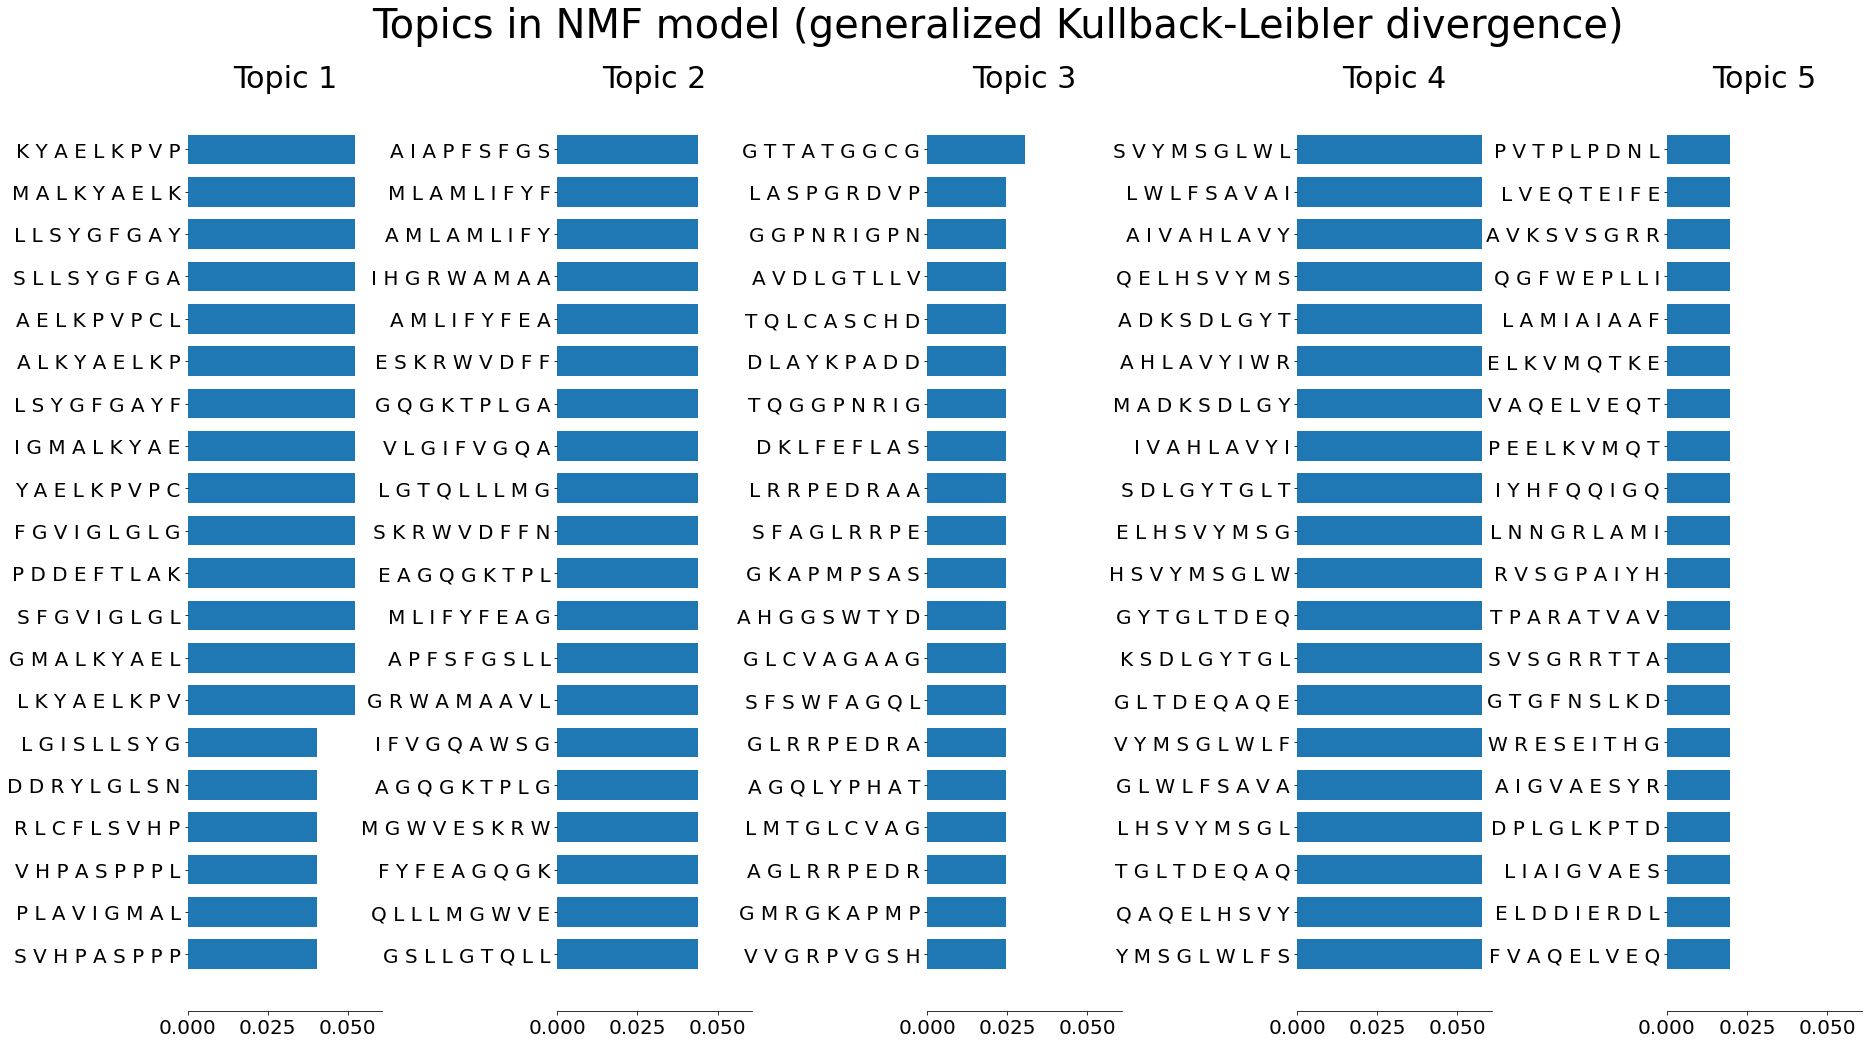



 Fitting LDA models with tf features, n_samples=2000 and n_features=1000...


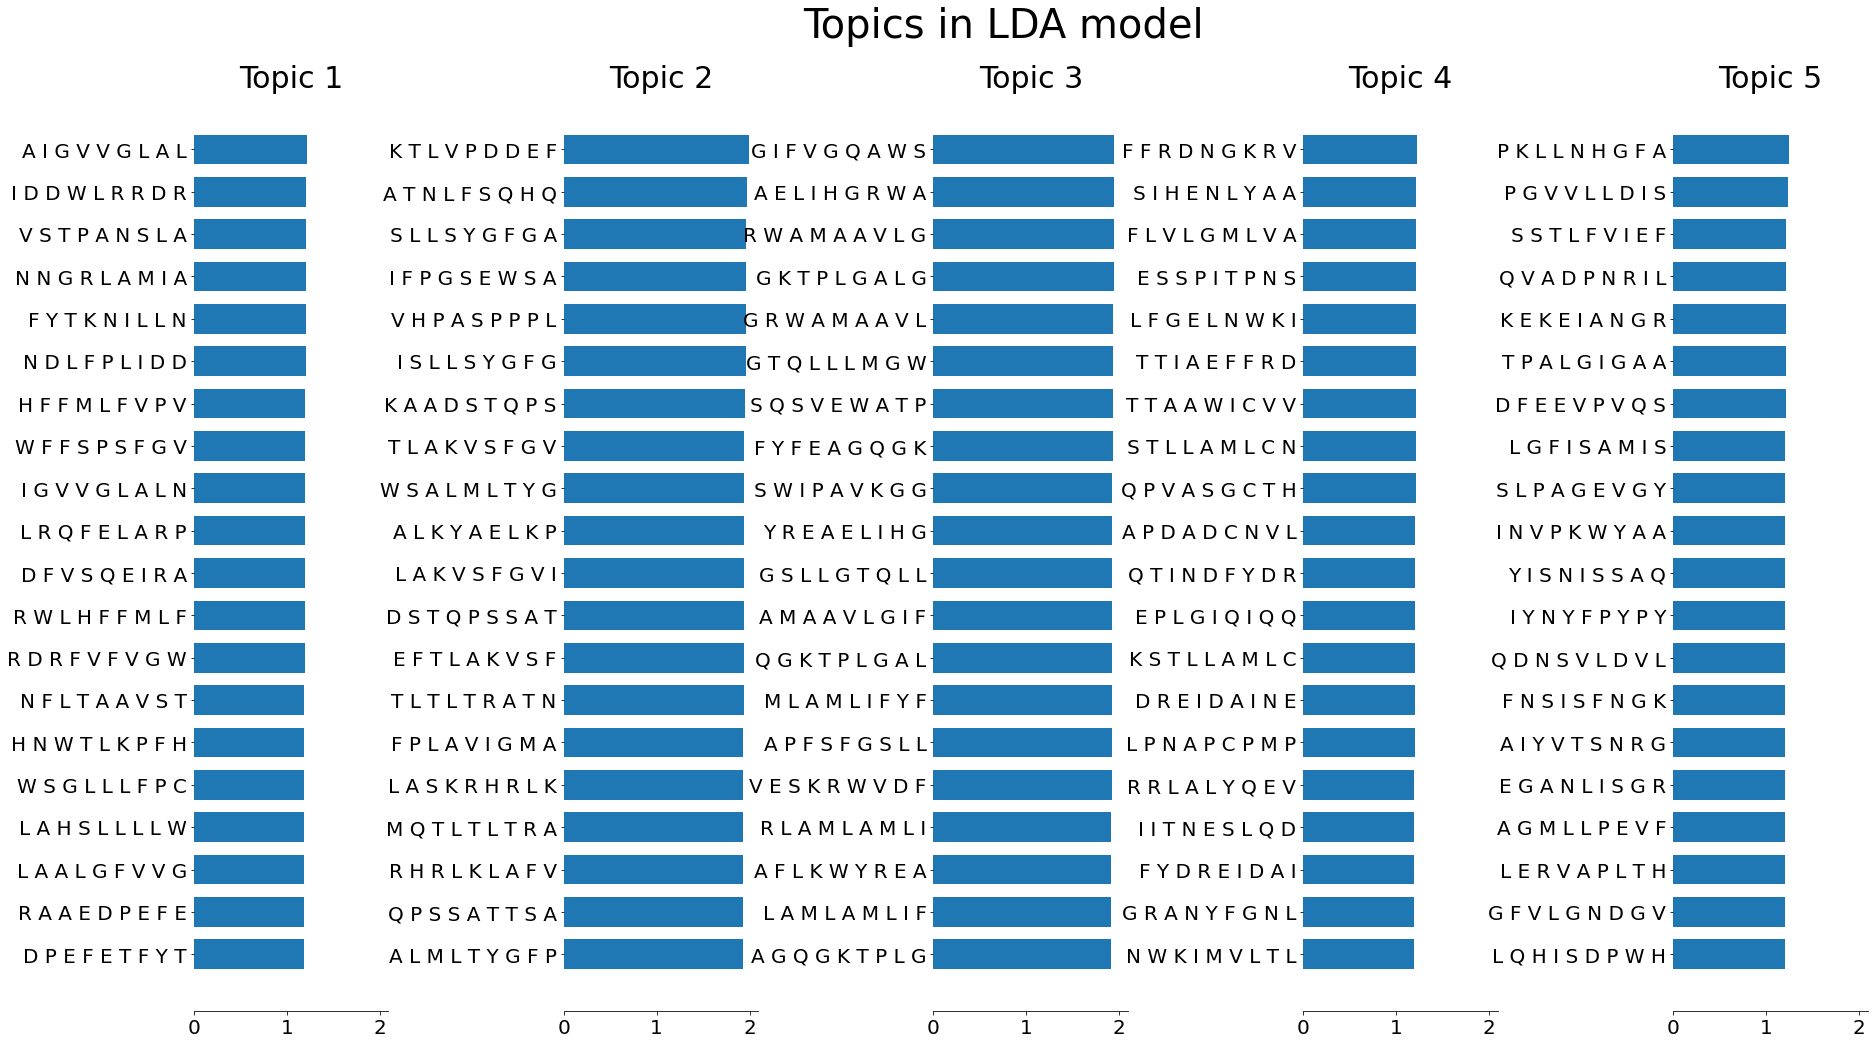




amino acid ngram range of study - (8, 8)
Extracting tf-idf features for NMF...
done in 0.035s.
Extracting tf features for LDA...
done in 0.024s.



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


done in 0.152s.


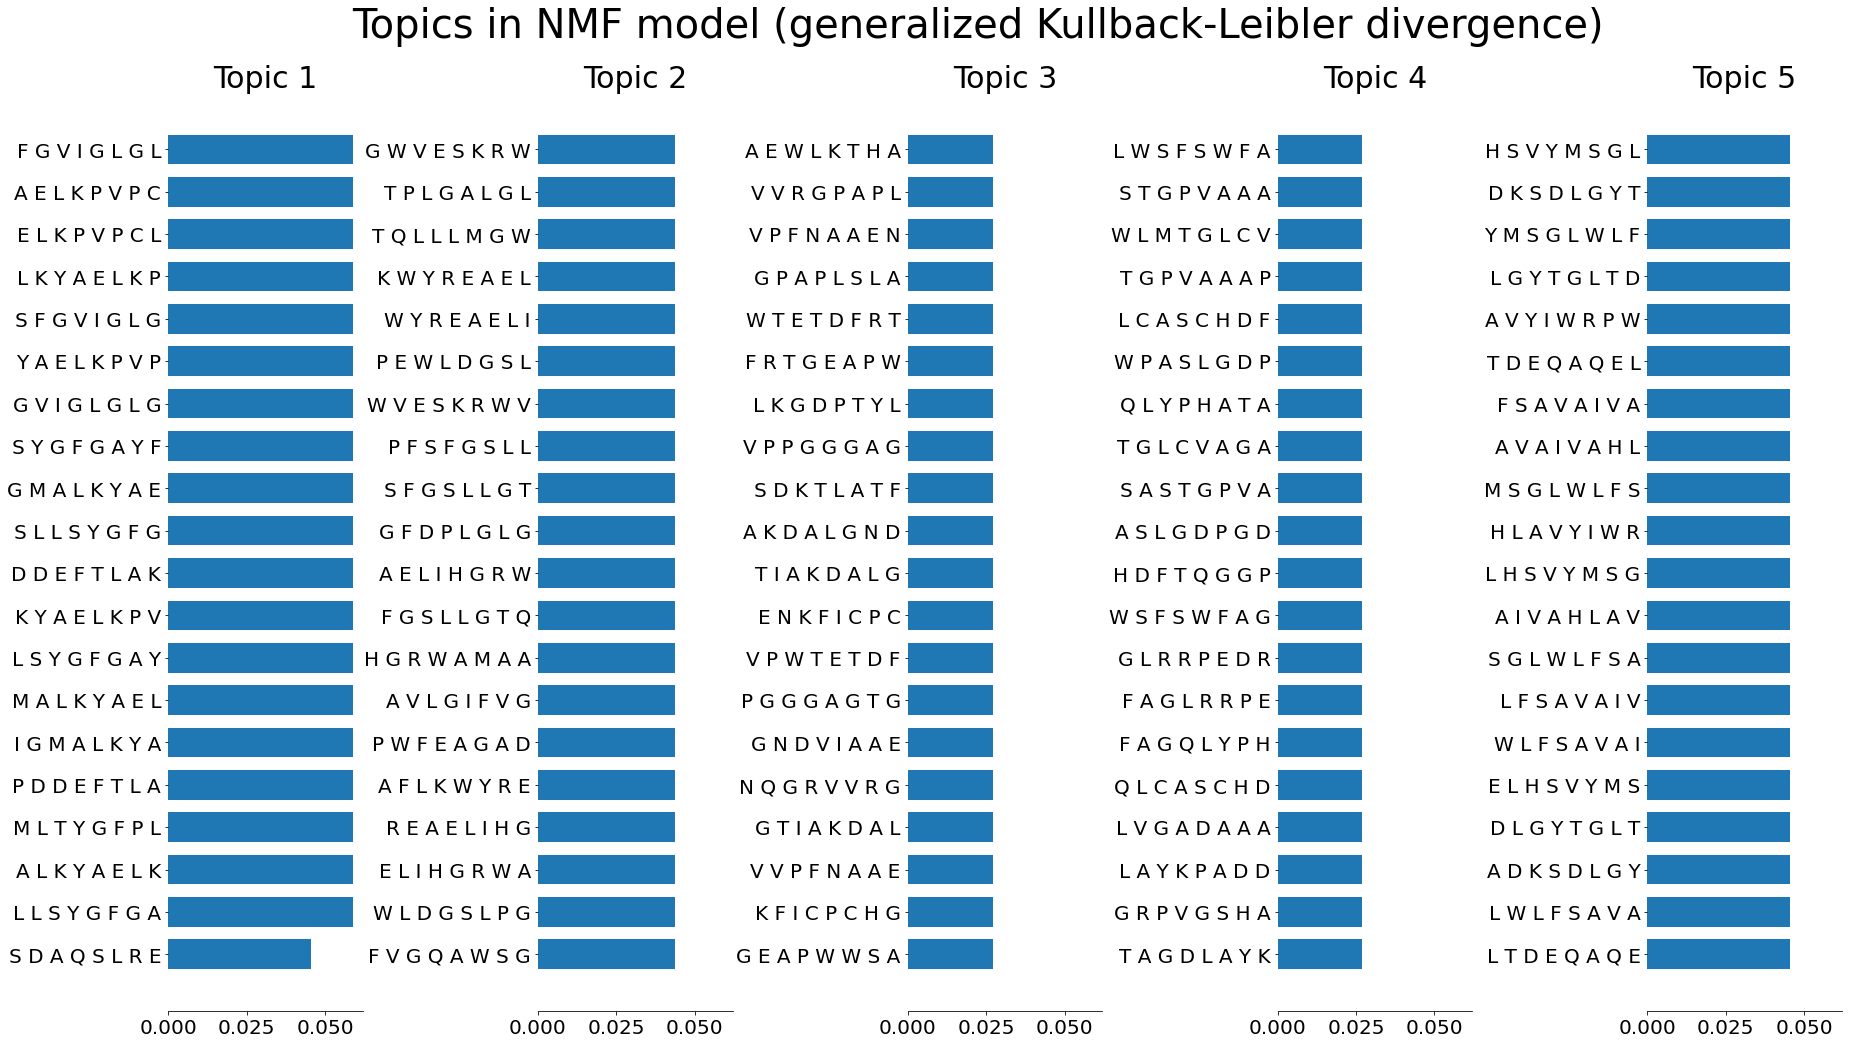



 Fitting LDA models with tf features, n_samples=2000 and n_features=1000...


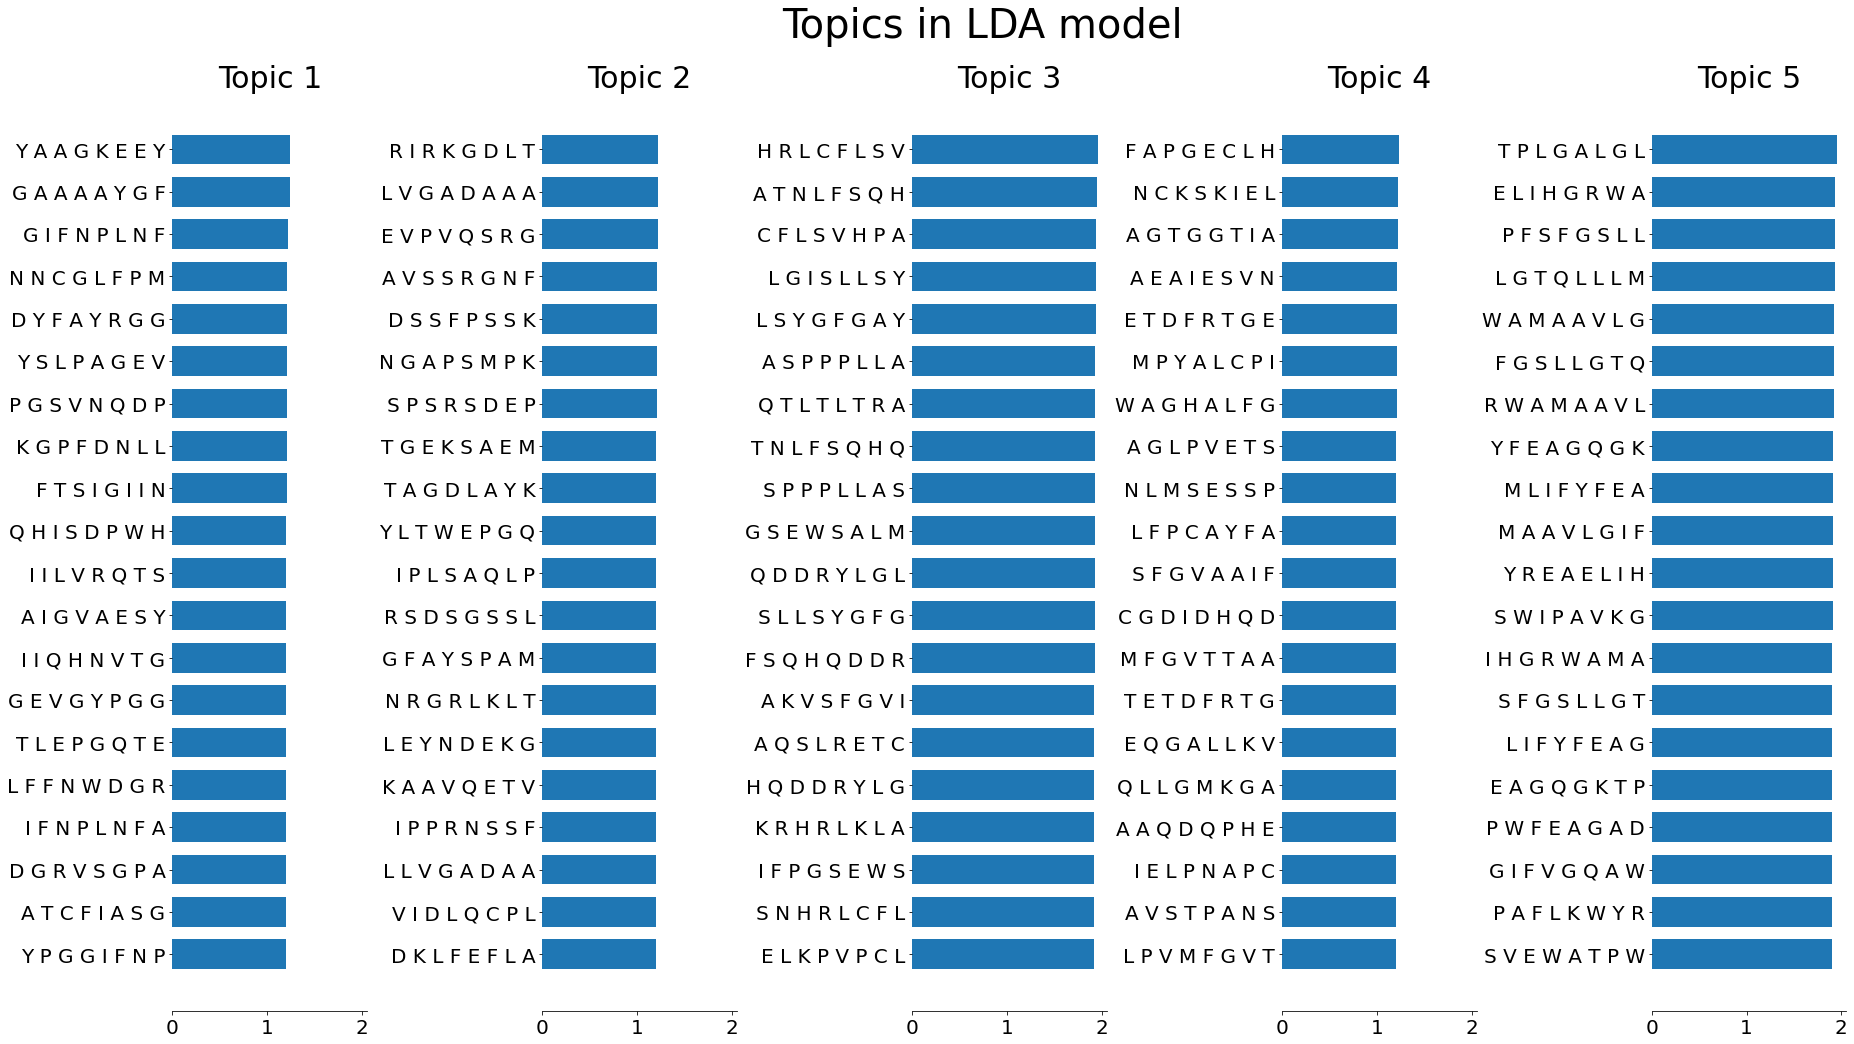




amino acid ngram range of study - (7, 7)
Extracting tf-idf features for NMF...
done in 0.037s.
Extracting tf features for LDA...
done in 0.024s.



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.112s.


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


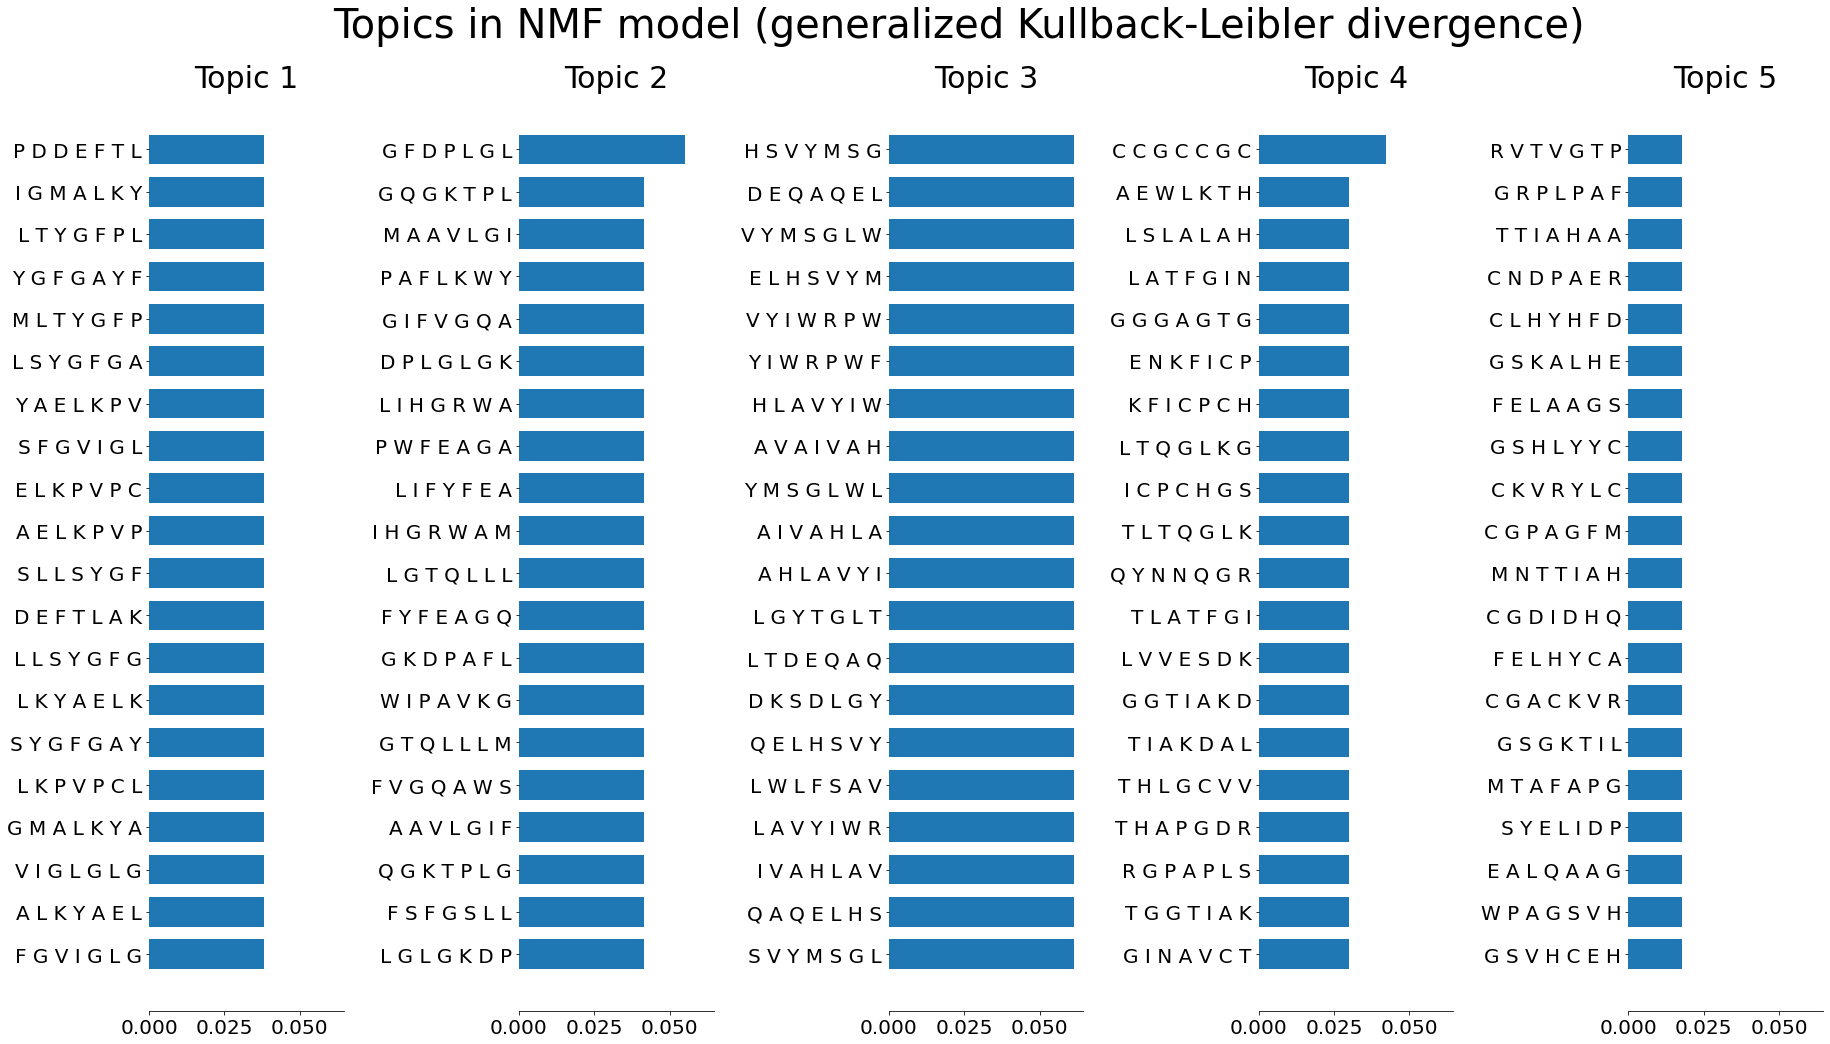



 Fitting LDA models with tf features, n_samples=2000 and n_features=1000...


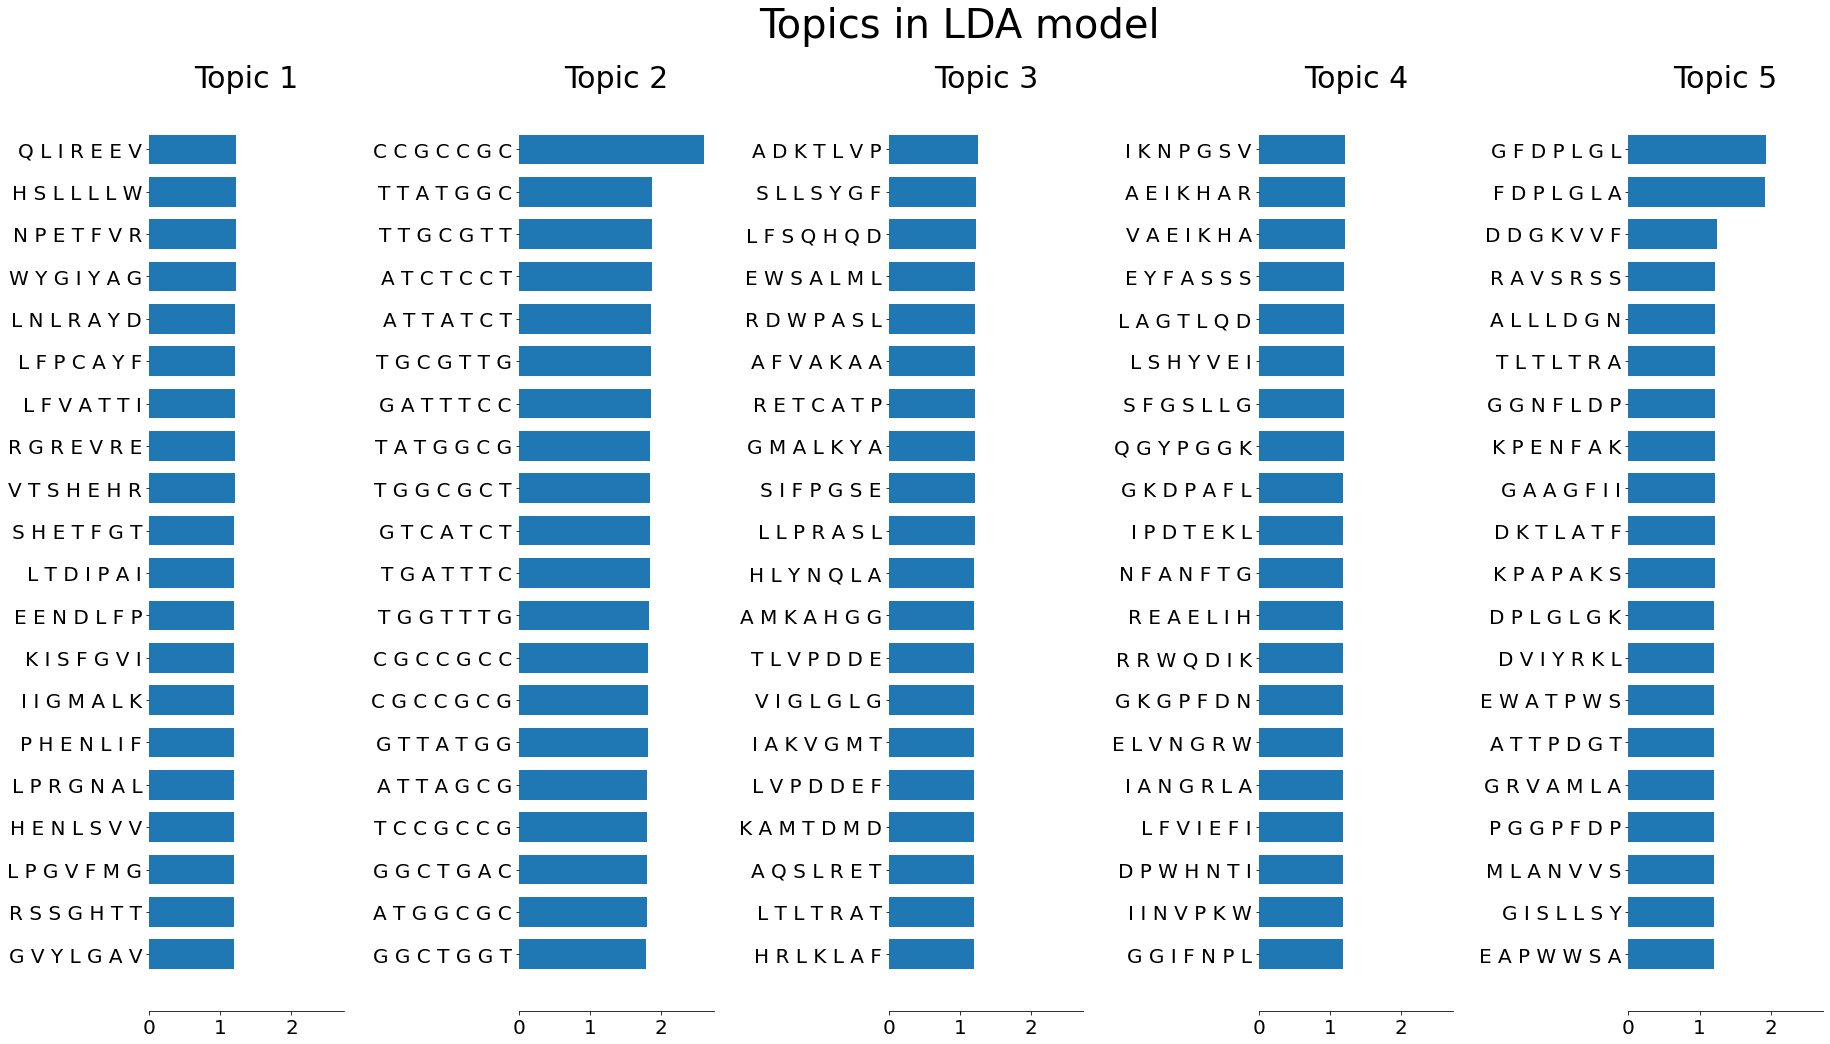




amino acid ngram range of study - (6, 6)
Extracting tf-idf features for NMF...
done in 0.042s.
Extracting tf features for LDA...
done in 0.022s.



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.110s.


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


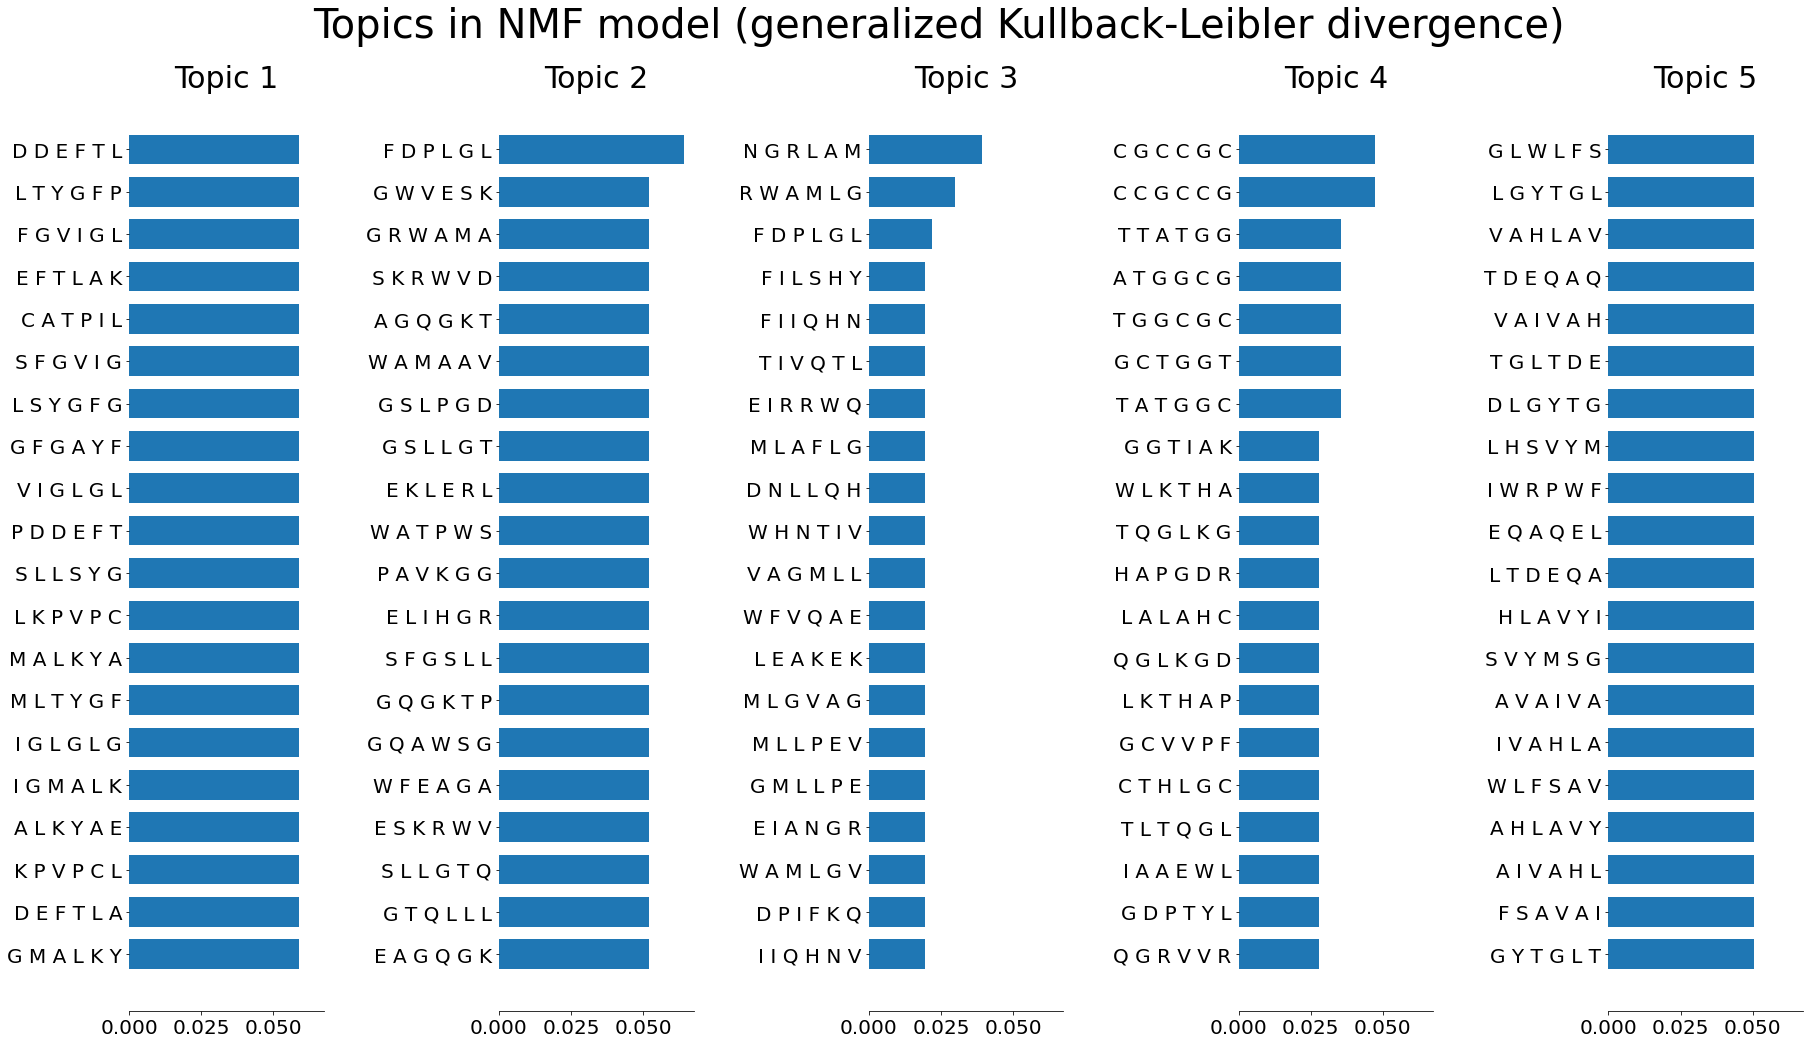



 Fitting LDA models with tf features, n_samples=2000 and n_features=1000...


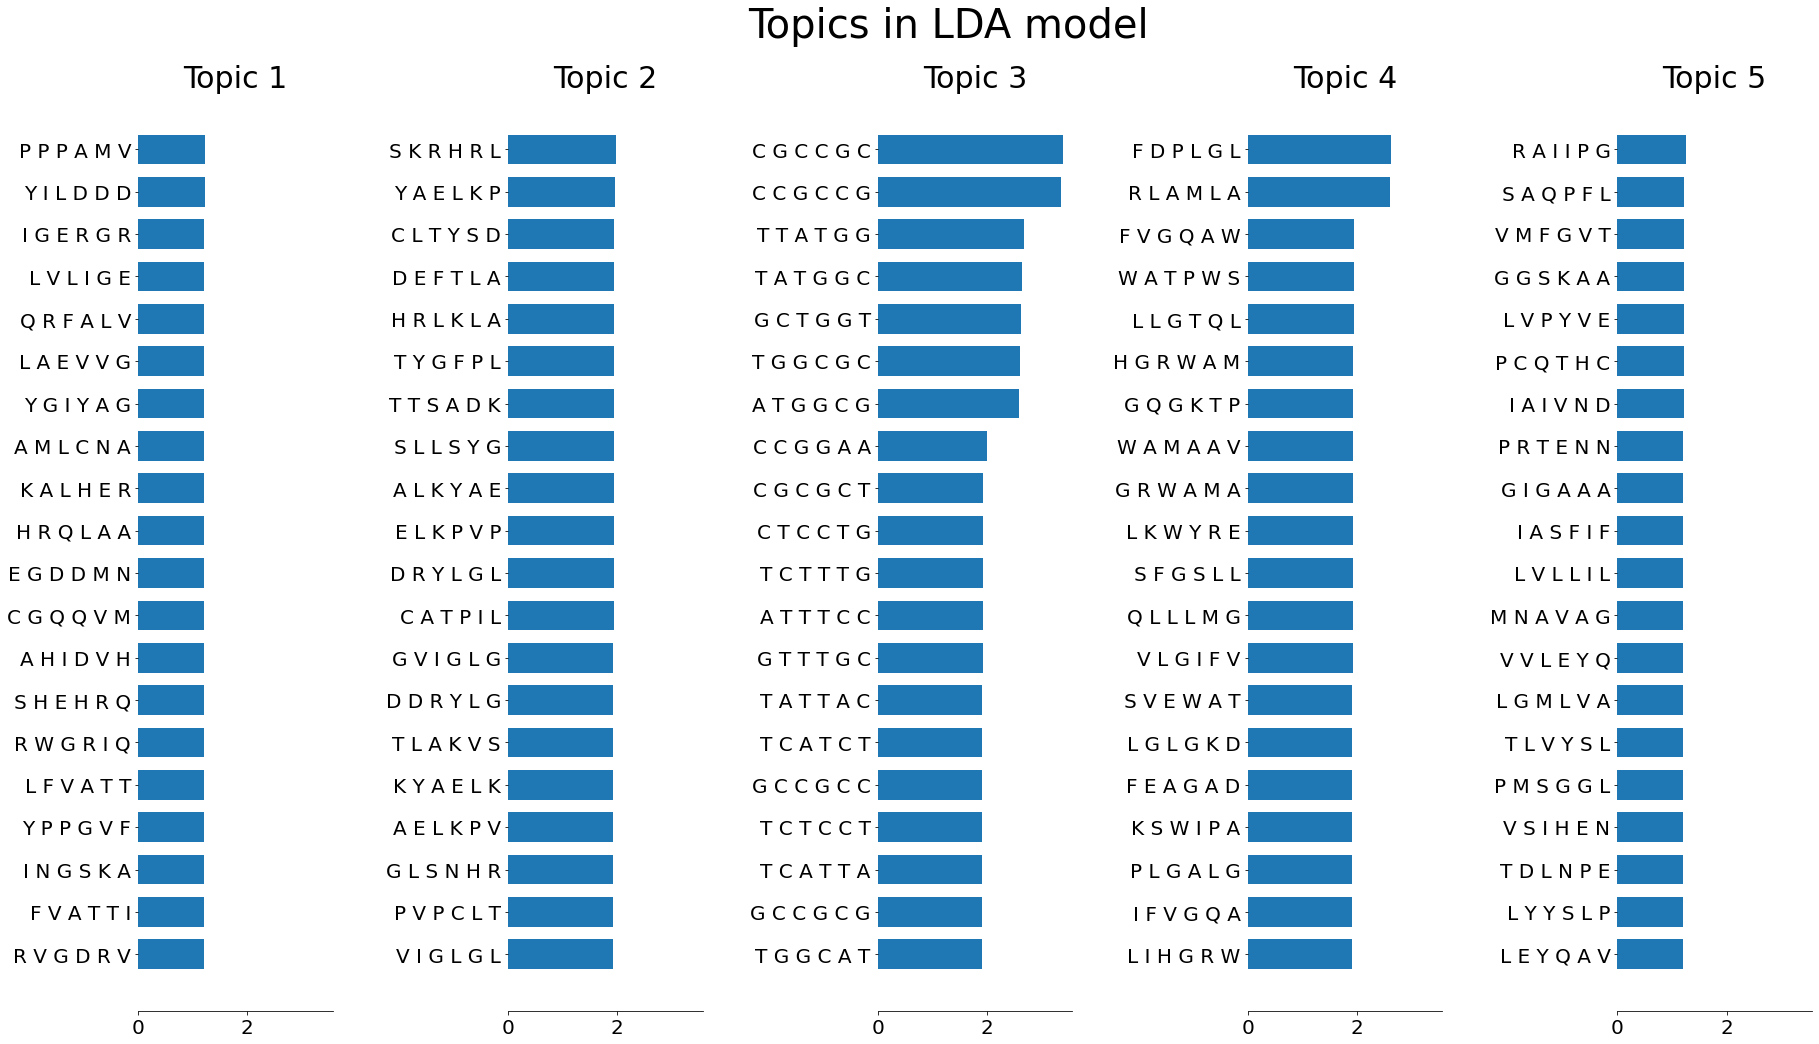




amino acid ngram range of study - (5, 5)
Extracting tf-idf features for NMF...
done in 0.035s.
Extracting tf features for LDA...
done in 0.024s.



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.107s.


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


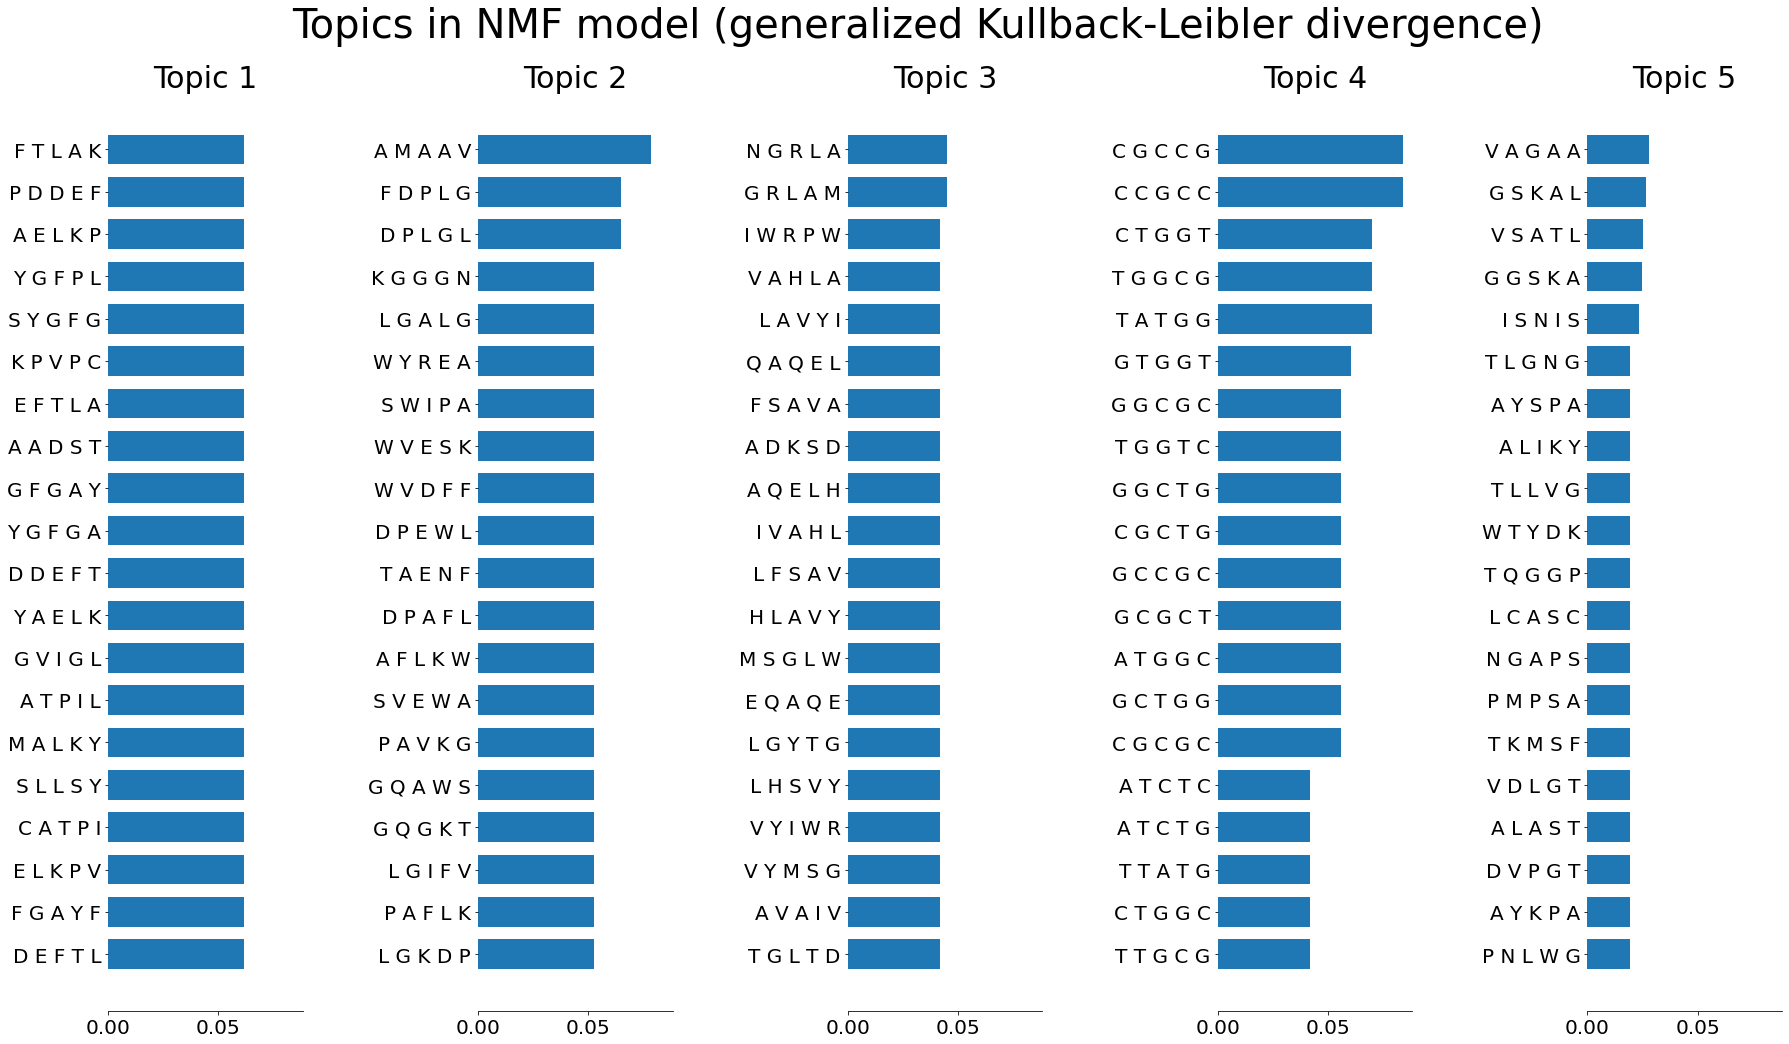



 Fitting LDA models with tf features, n_samples=2000 and n_features=1000...


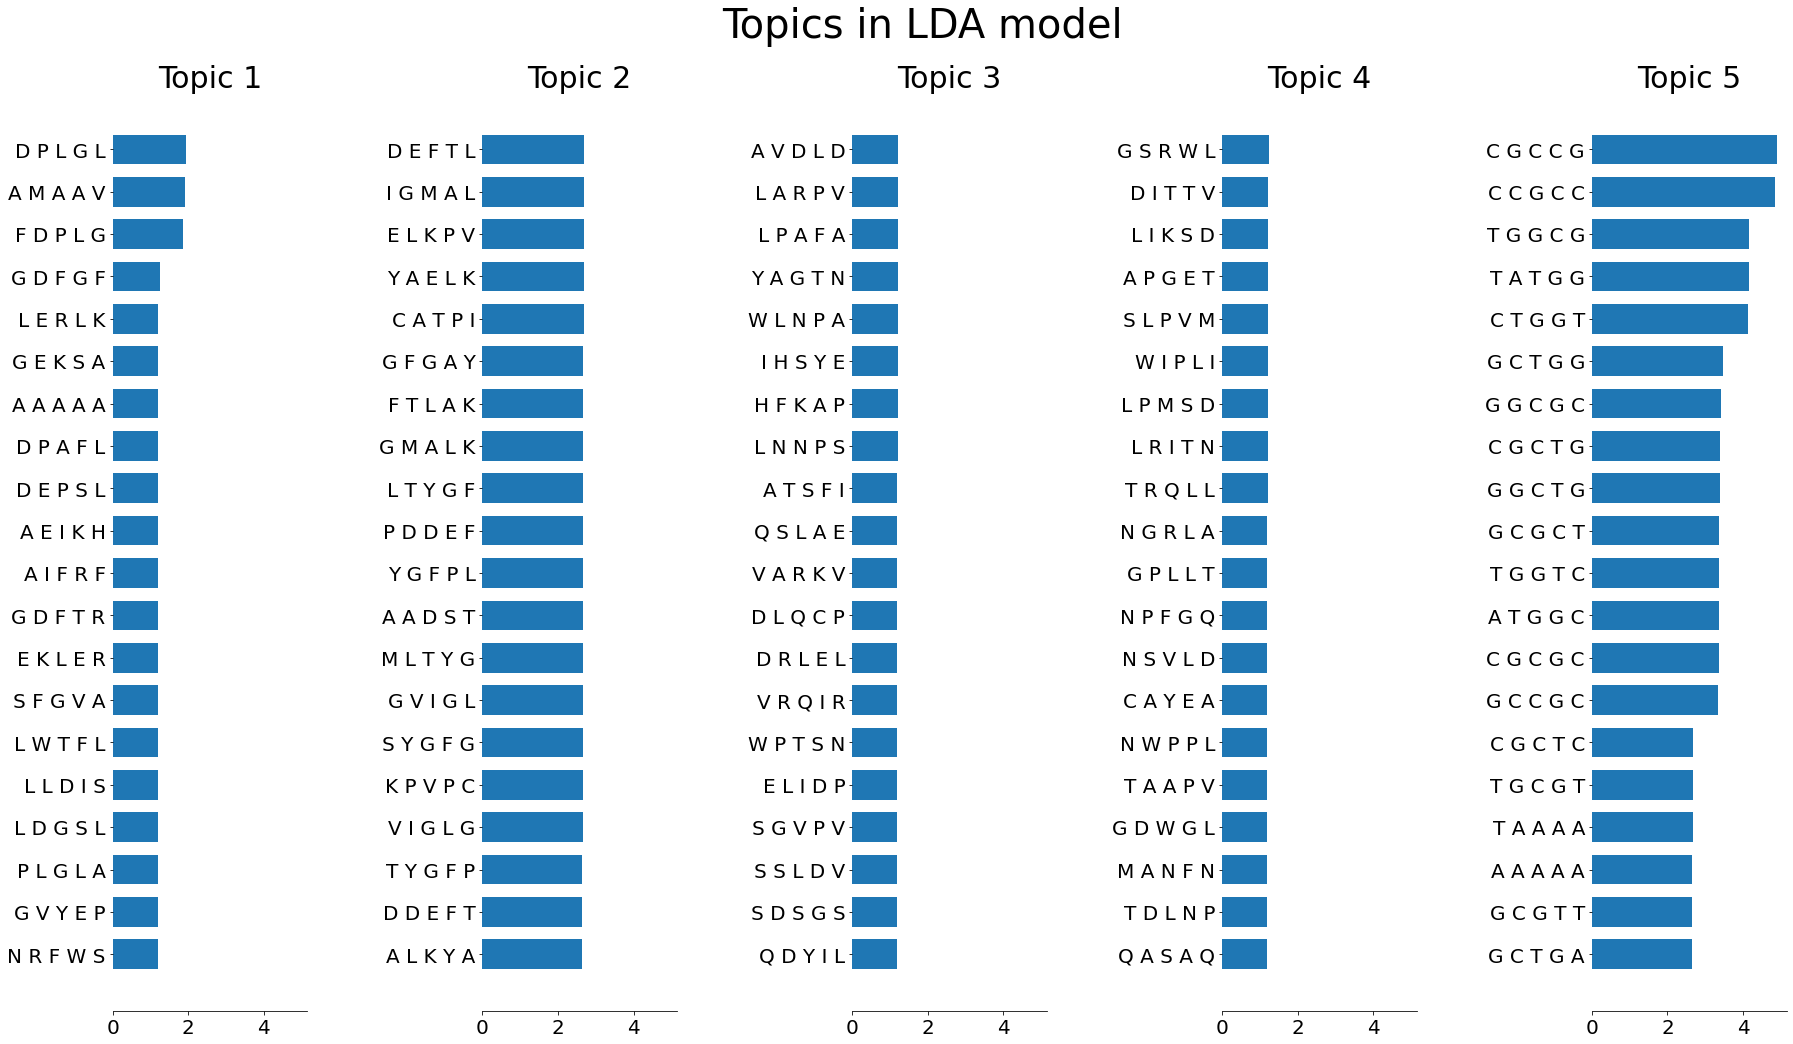




amino acid ngram range of study - (4, 4)
Extracting tf-idf features for NMF...
done in 0.032s.
Extracting tf features for LDA...
done in 0.026s.



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.103s.


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


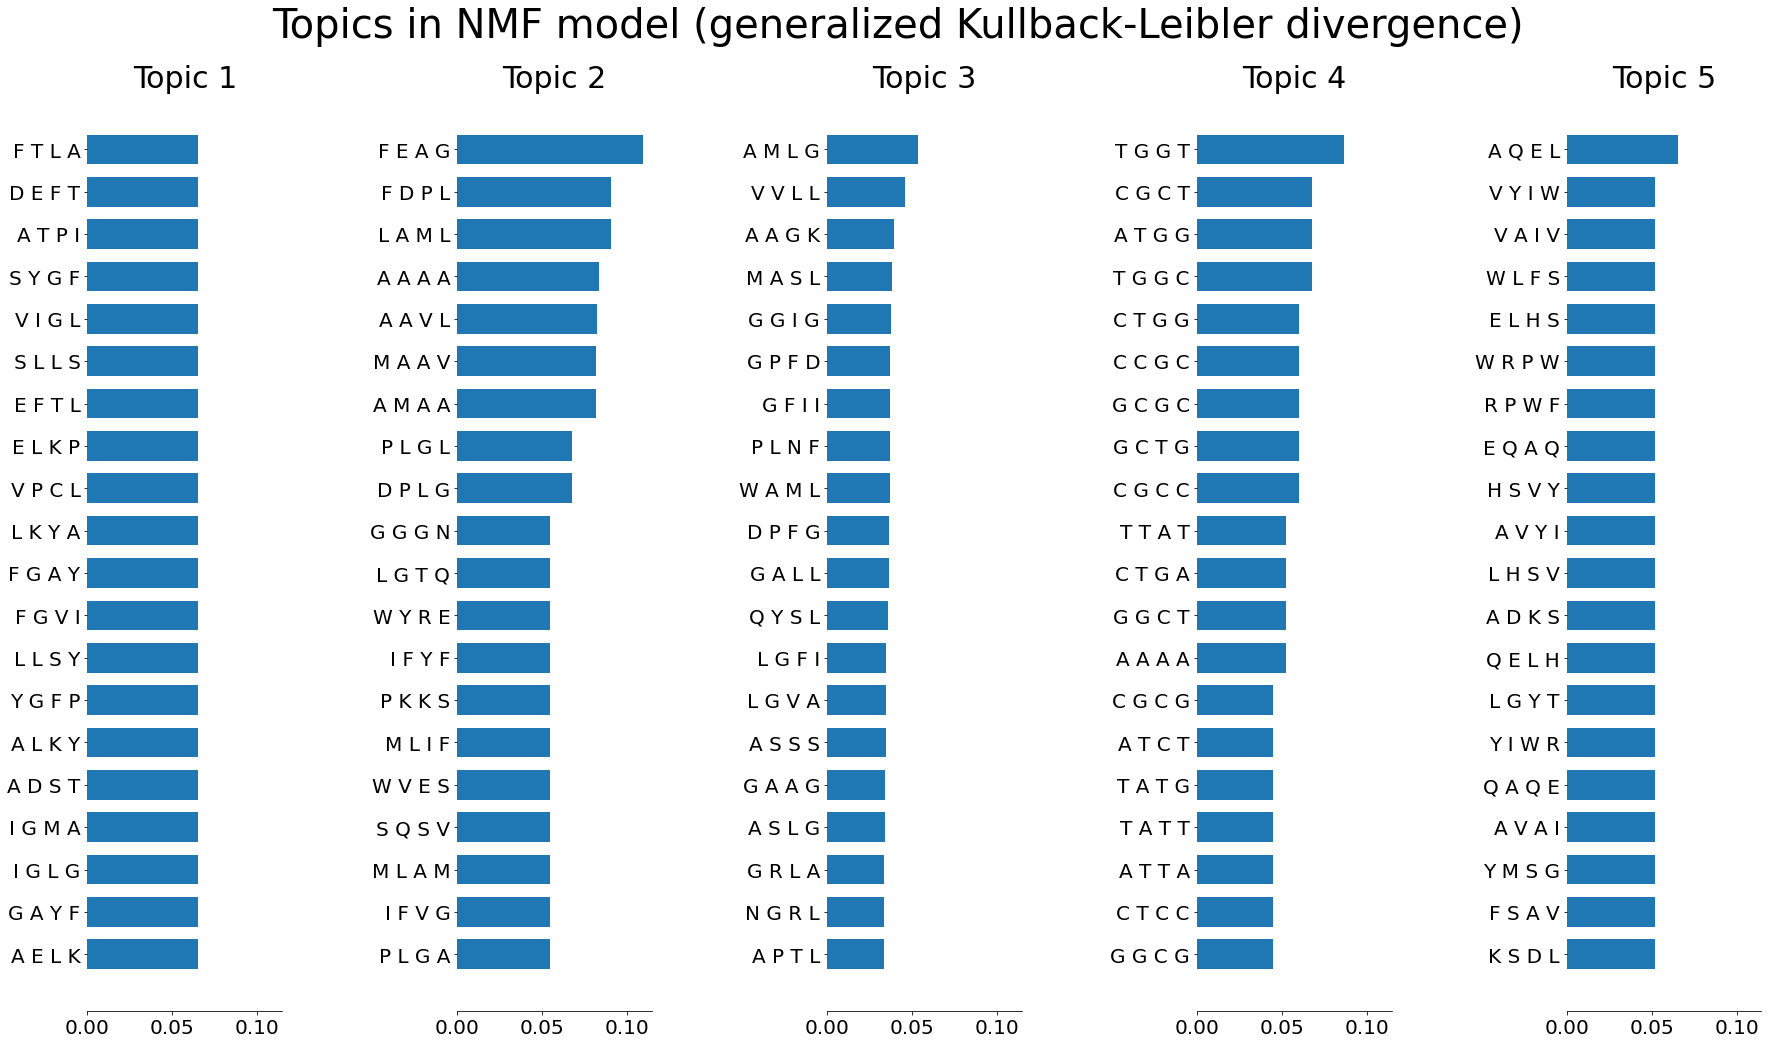



 Fitting LDA models with tf features, n_samples=2000 and n_features=1000...


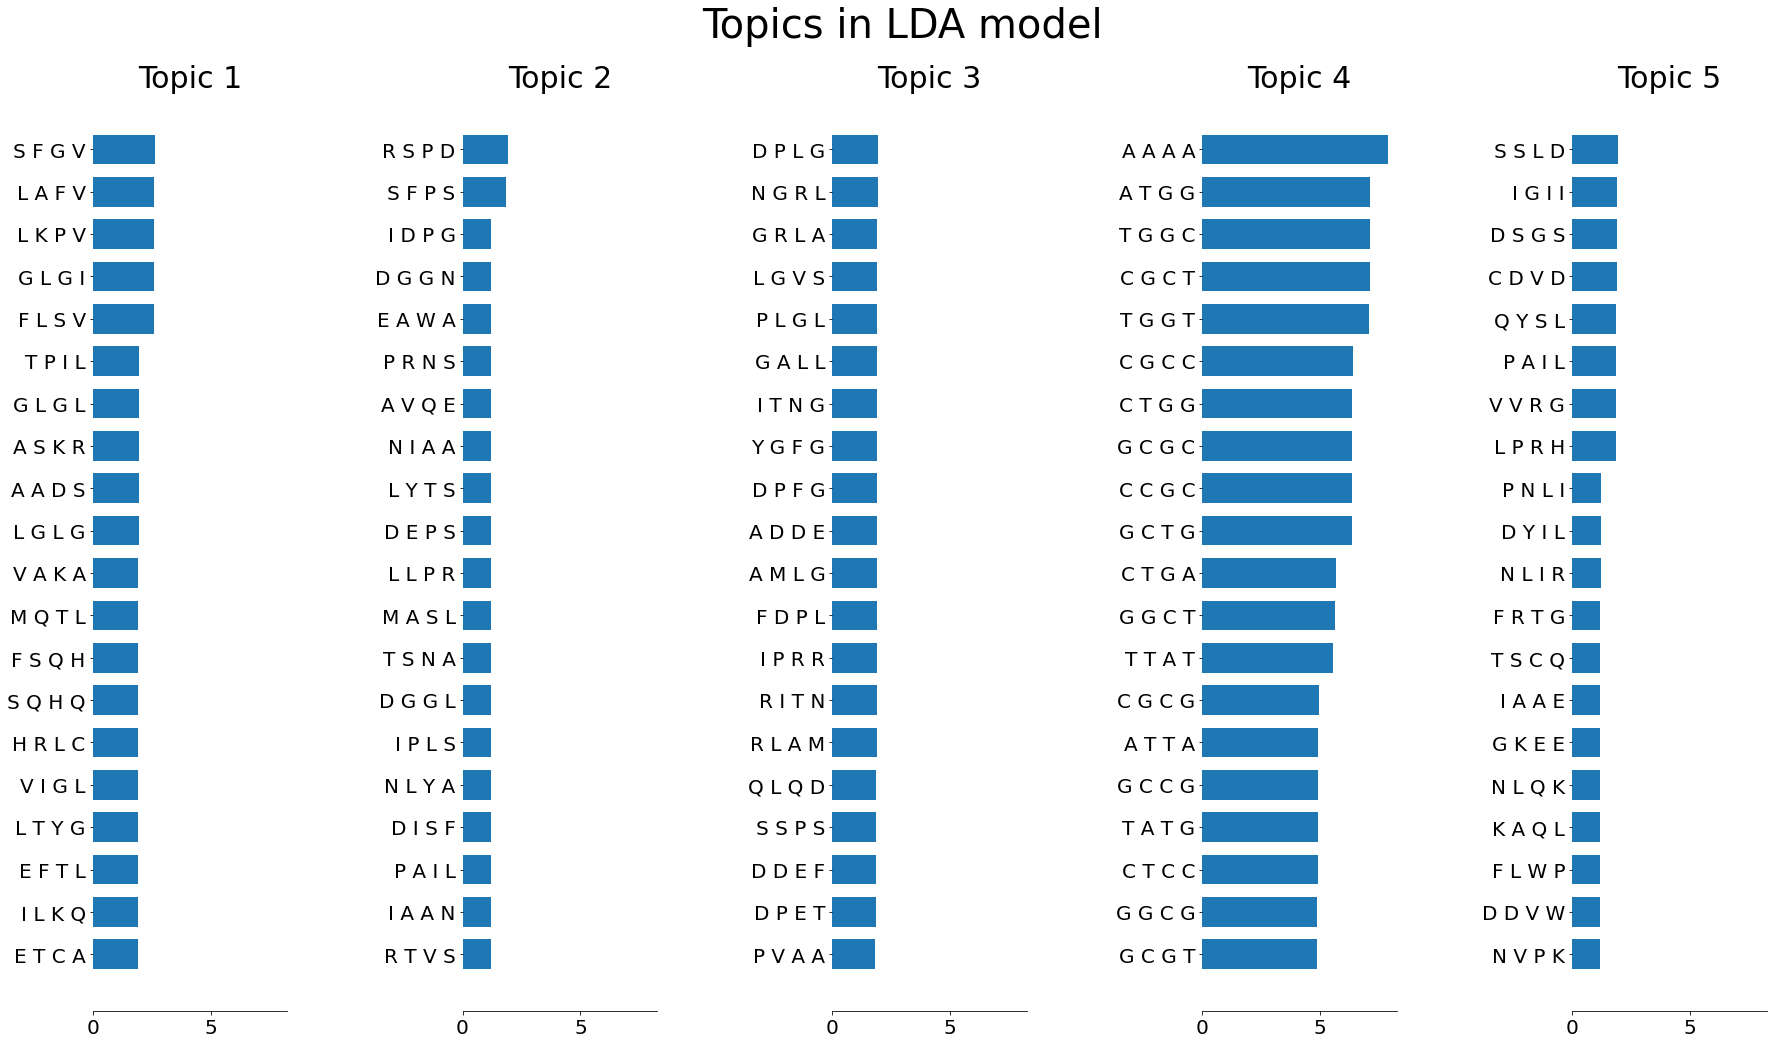




amino acid ngram range of study - (3, 3)
Extracting tf-idf features for NMF...
done in 0.023s.
Extracting tf features for LDA...
done in 0.026s.



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.135s.


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


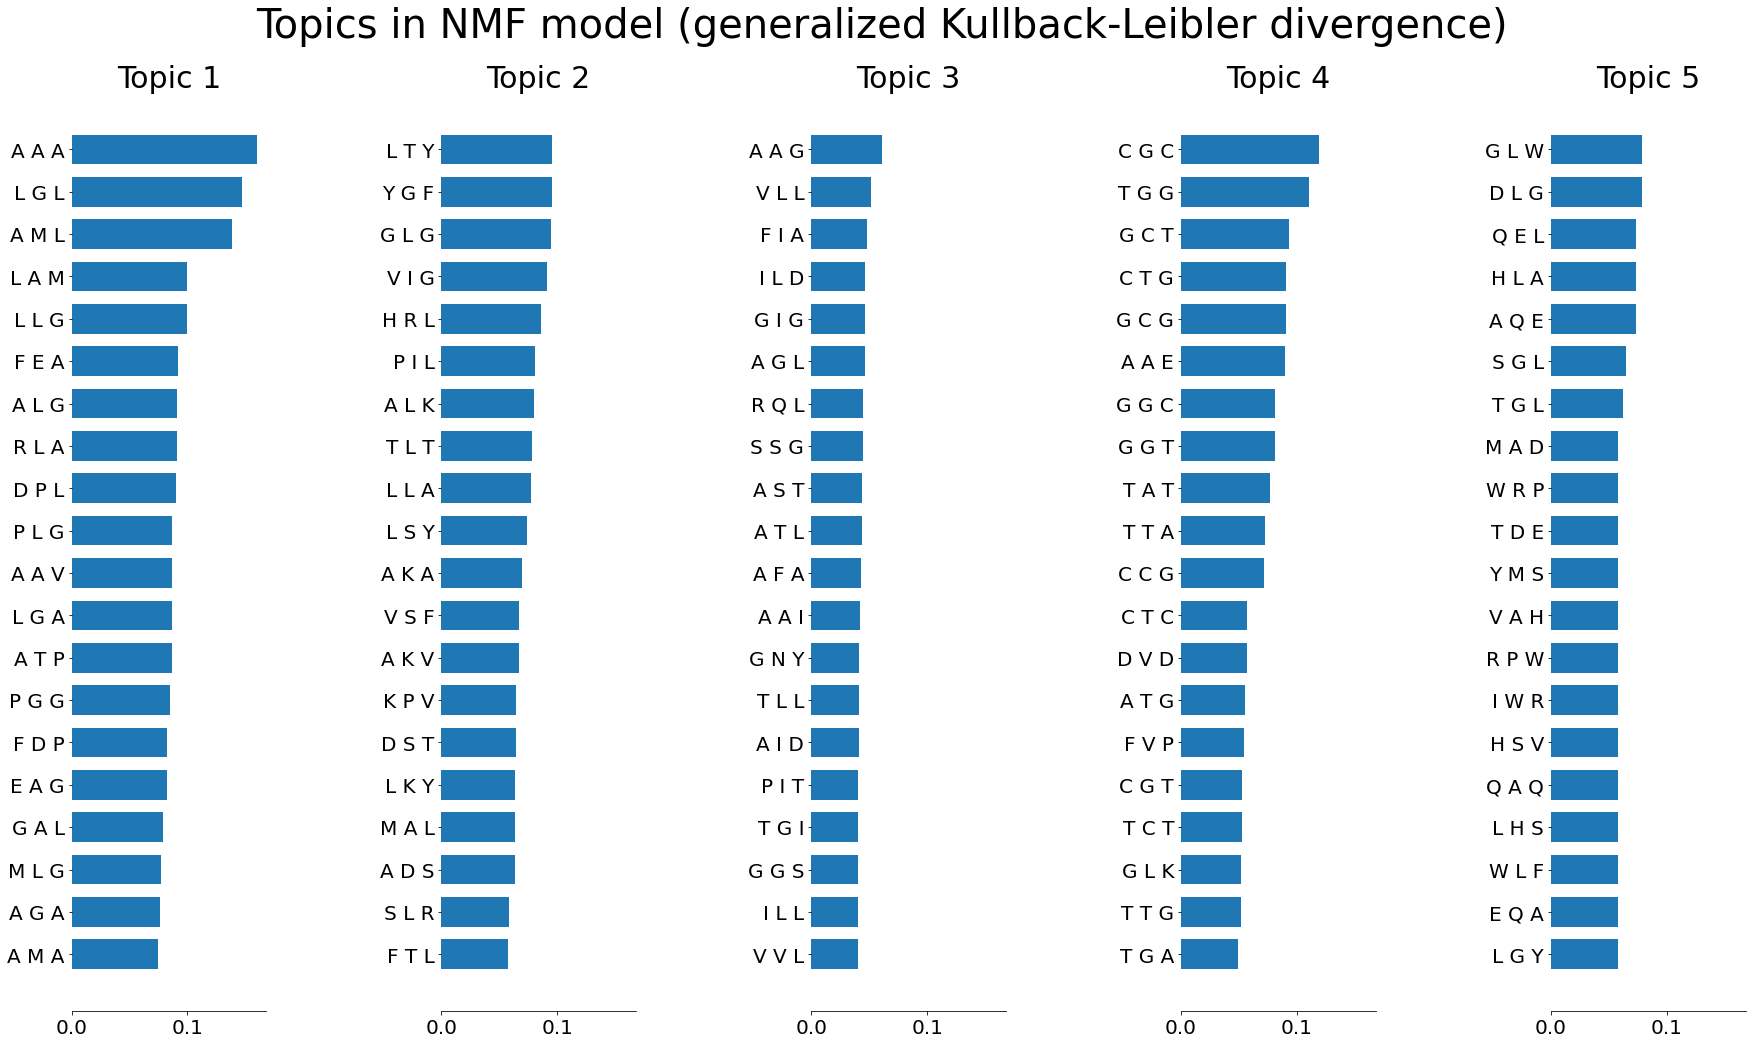



 Fitting LDA models with tf features, n_samples=2000 and n_features=1000...


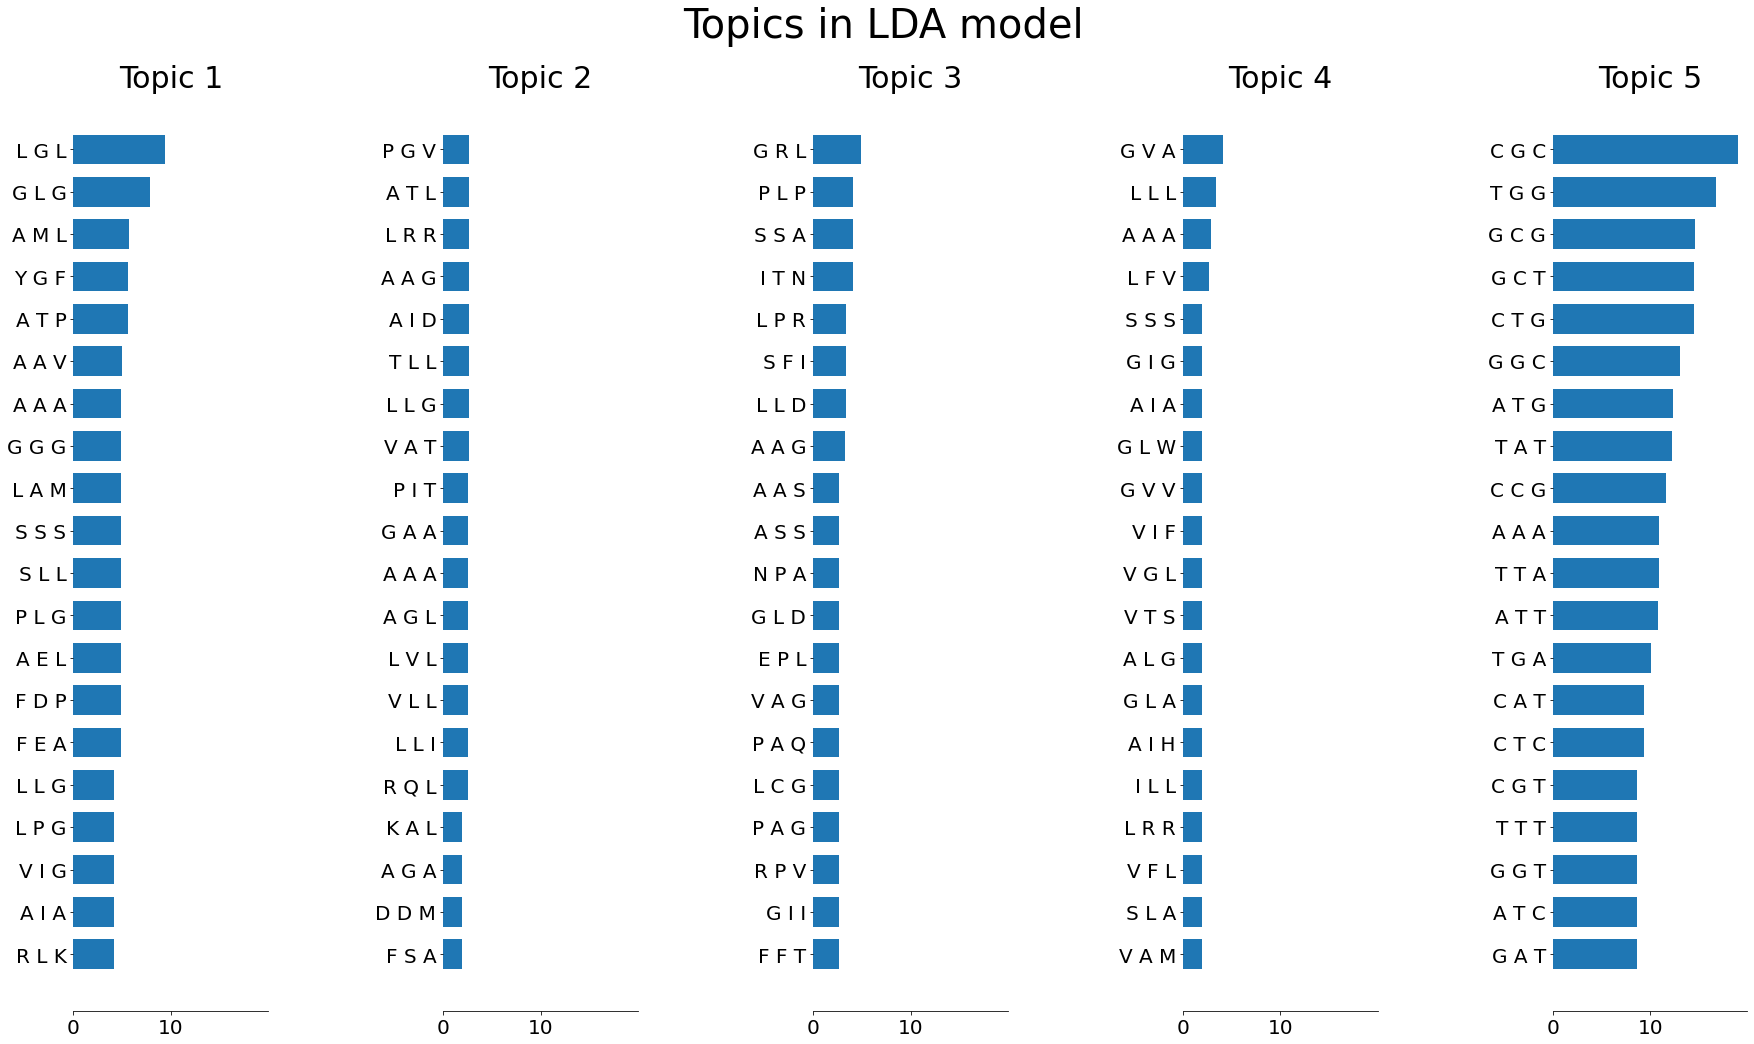




amino acid ngram range of study - (2, 2)
Extracting tf-idf features for NMF...
done in 0.015s.
Extracting tf features for LDA...
done in 0.011s.



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.161s.


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


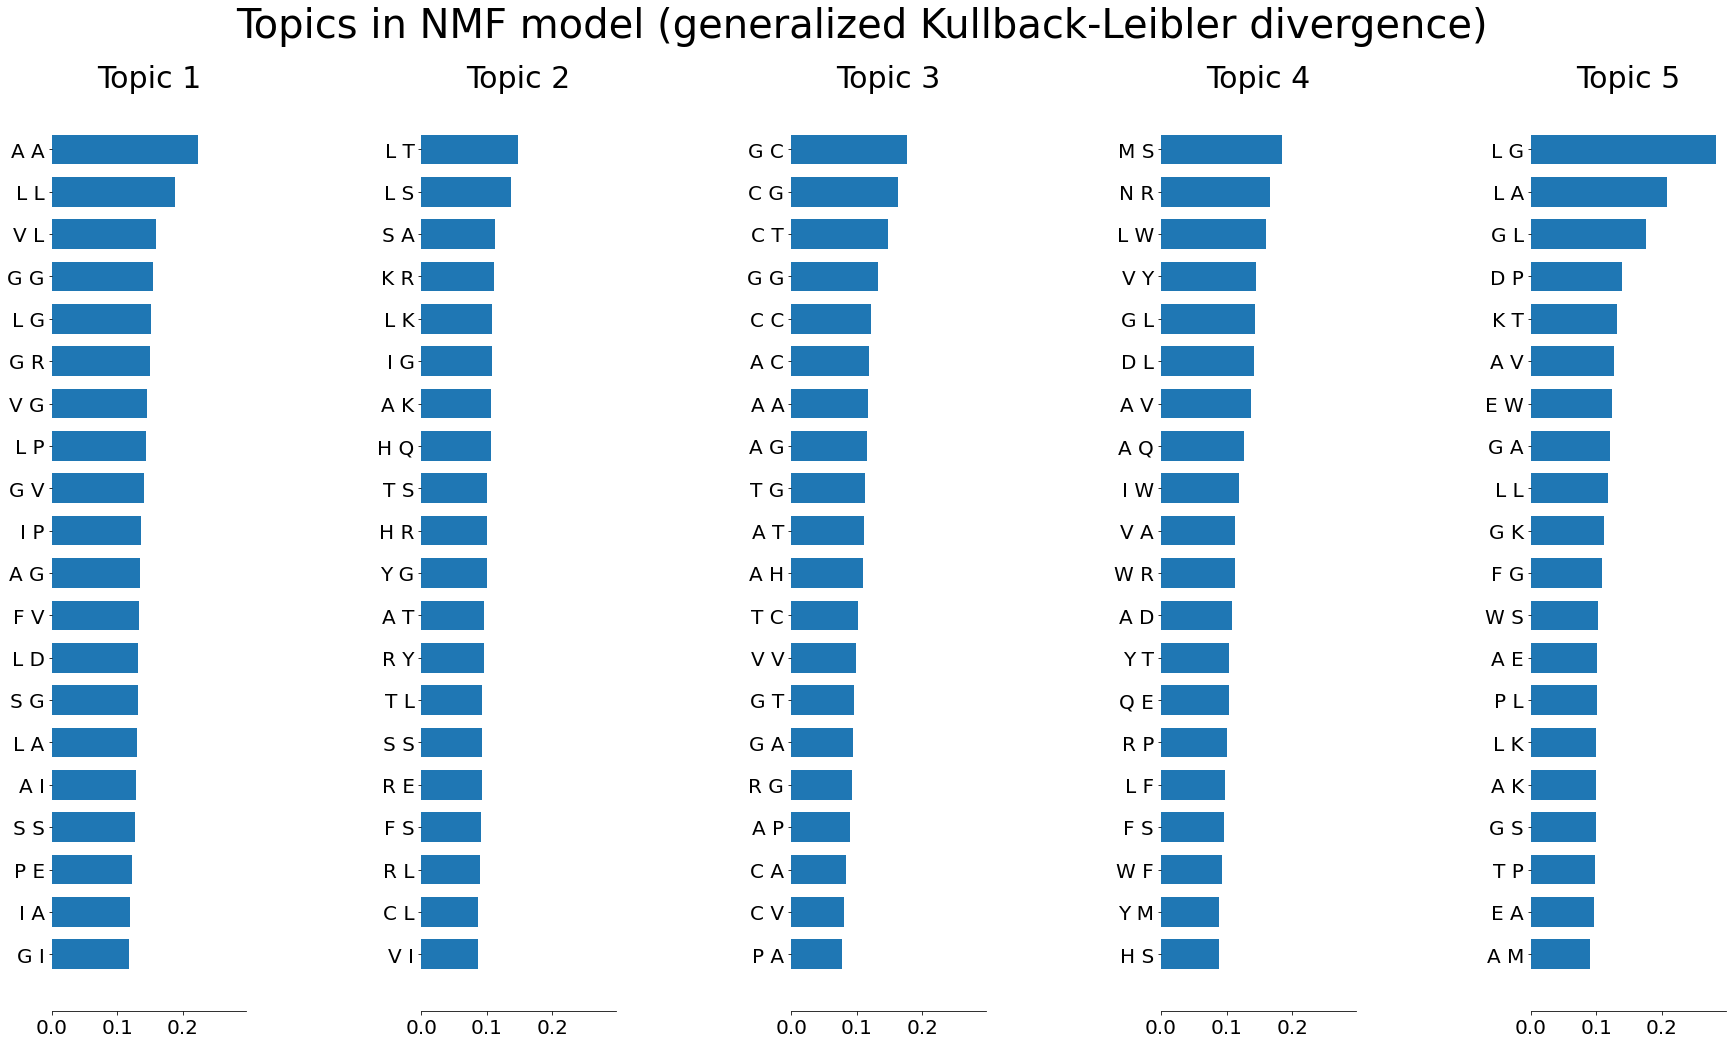



 Fitting LDA models with tf features, n_samples=2000 and n_features=1000...


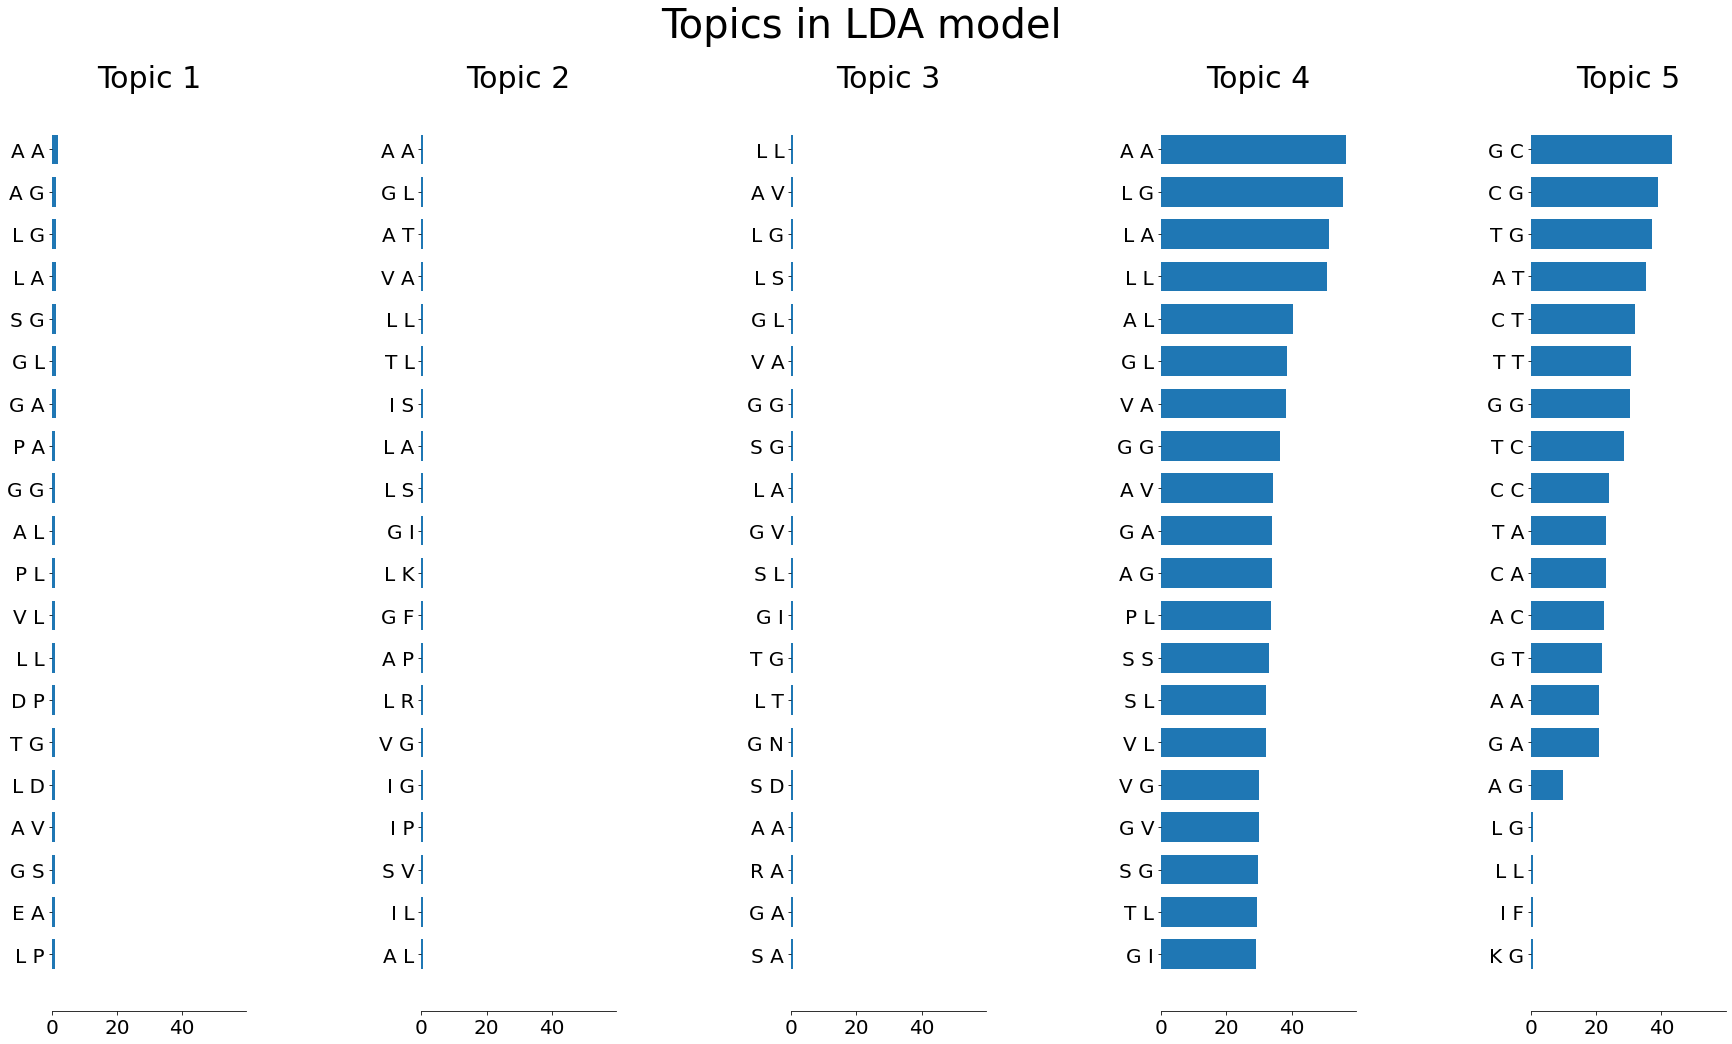




amino acid ngram range of study - (1, 1)
Extracting tf-idf features for NMF...
done in 0.010s.
Extracting tf features for LDA...
done in 0.006s.



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...


/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1425: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


done in 0.294s.


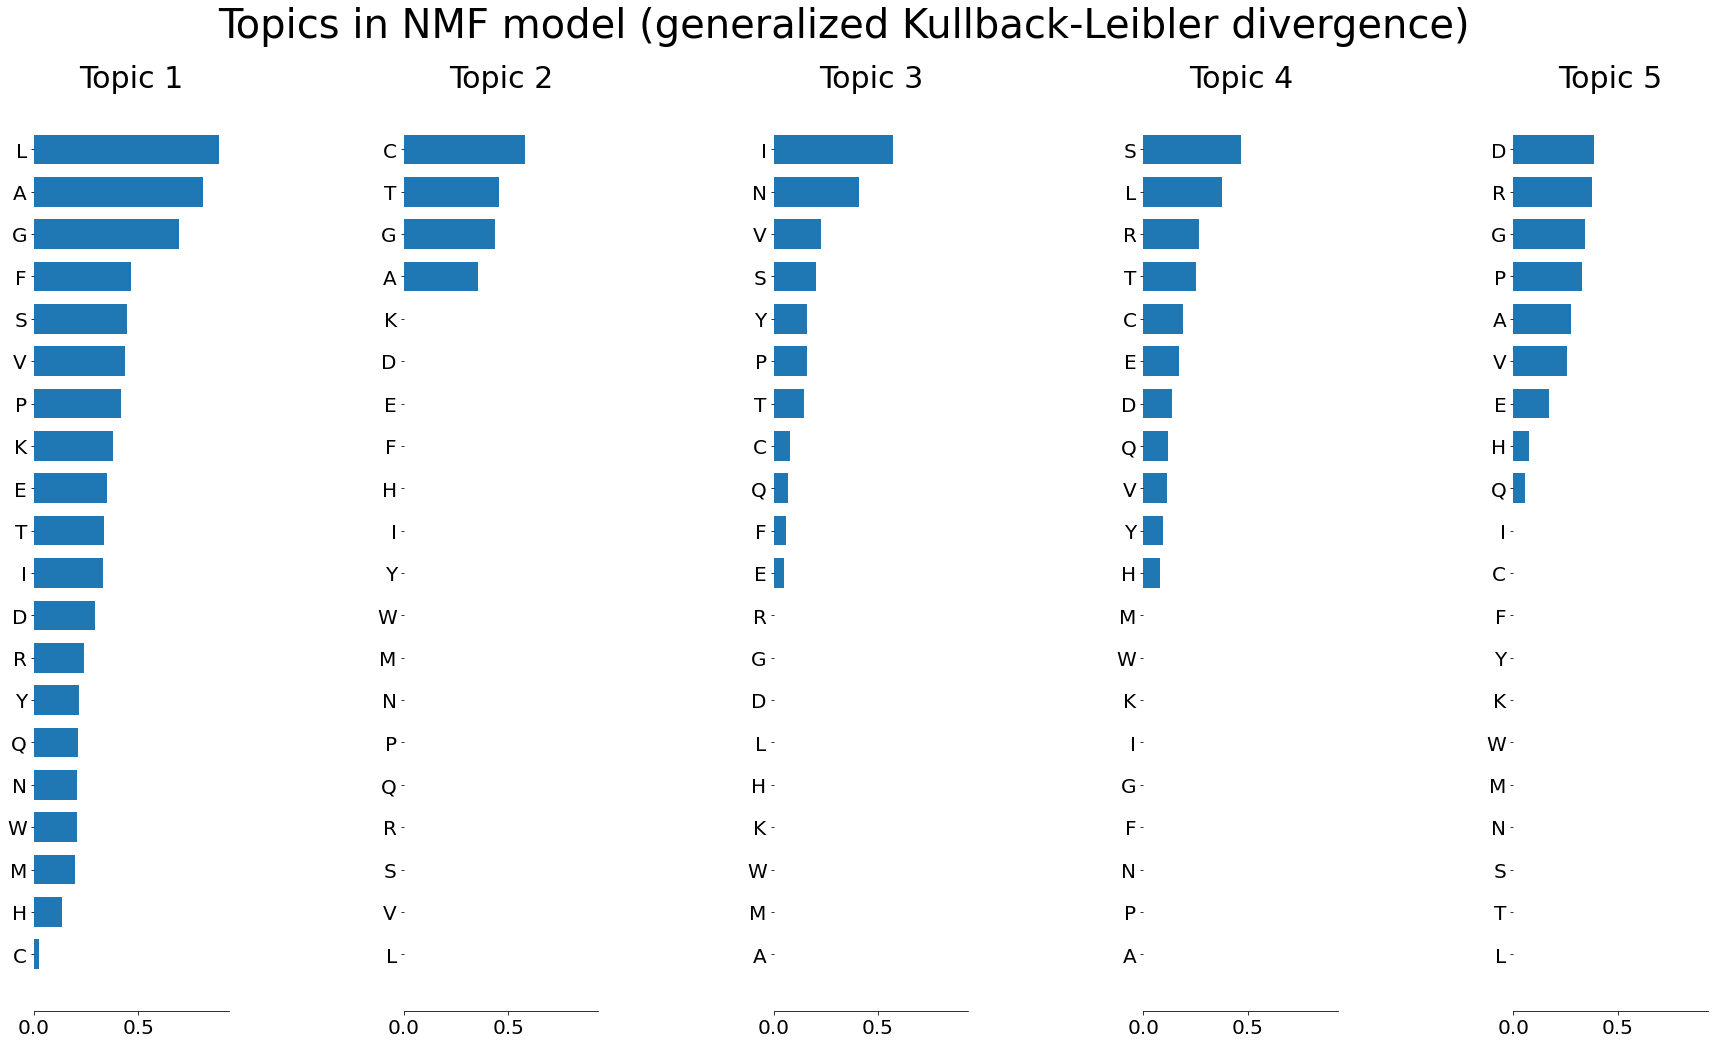



 Fitting LDA models with tf features, n_samples=2000 and n_features=1000...


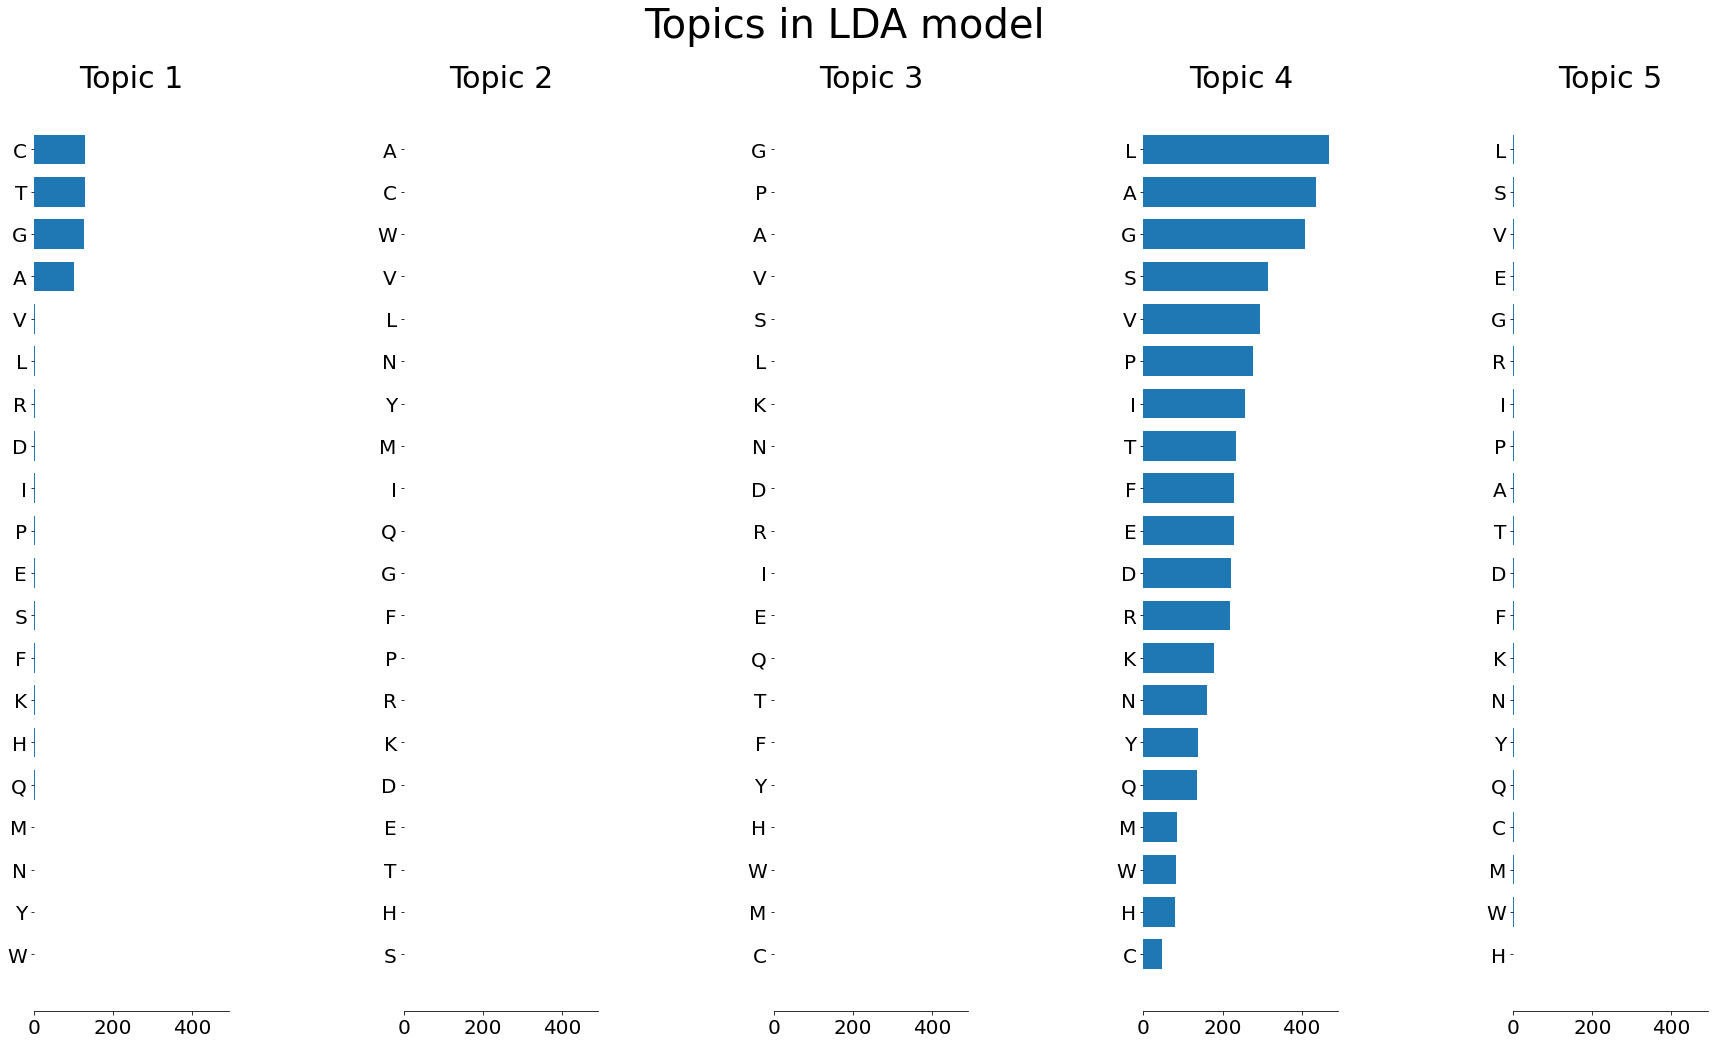

In [37]:
data_samples = df['protein split']
buf_df = pd.DataFrame()

for ngram_range_seed in ngram_ranges:

  # build ngram range tuple
  ngram_range = (ngram_range_seed, ngram_range_seed)
  print()
  print()
  print()
  print('amino acid ngram range of study - %s' % (ngram_range,))


# Use tf-idf features for NMF.
  print("Extracting tf-idf features for NMF...")
  tfidf_vectorizer = TfidfVectorizer(
                                  token_pattern='(?u)\\b\\w+\\b'
                                , lowercase=False
                                , ngram_range=ngram_range  
                                ,  
                                #    max_df=1
                                #  , min_df=2
                                #    max_features=n_features
                                #  , stop_words="english"
)
  t0 = time()
  tfidf = tfidf_vectorizer.fit_transform(data_samples)
  print("done in %0.3fs." % (time() - t0))

  # Use tf (raw term count) features for LDA.
  print("Extracting tf features for LDA...")
  tf_vectorizer = CountVectorizer(
                                    token_pattern='(?u)\\b\\w+\\b'
                                  , lowercase=False
                                  , ngram_range=ngram_range
                                  , 
                                  #    max_df=1
                                  #  , min_df=2
                                  #   max_features=n_features
                                  #  , stop_words="english"
  )
  t0 = time()
  tf = tf_vectorizer.fit_transform(data_samples)
  print("done in %0.3fs." % (time() - t0))
  print()


  # Fit the NMF model
  print(
      "\n" * 2,
      "Fitting the NMF model (generalized Kullback-Leibler "
      "divergence) with tf-idf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features),
  )
  t0 = time()
  nmf = NMF(
      n_components=n_components,
      random_state=1,
      beta_loss="kullback-leibler",
      solver="mu",
      max_iter=1000,
      alpha=0.1,
      l1_ratio=0.5,
  ).fit(tfidf)
  print("done in %0.3fs." % (time() - t0))

  tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
  dfff = plot_top_words(
      nmf,
      tfidf_feature_names,
      n_top_words,
      "Topics in NMF model (generalized Kullback-Leibler divergence)"
  )

  dfff['ngram_seed'] = ngram_range_seed
  buf_df = pd.concat([buf_df, dfff])

  print(
      "\n" * 2,
      "Fitting LDA models with tf features, n_samples=%d and n_features=%d..."
      % (n_samples, n_features),
  )
  lda = LatentDirichletAllocation(
      n_components=n_components,
      max_iter=25,
      learning_method="online",
      learning_offset=50.0,
      random_state=0,
  )

  lda.fit(tf)

  tf_feature_names = tf_vectorizer.get_feature_names_out()
  dff = plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")

  dff['ngram_seed'] = ngram_range_seed
  buf_df = pd.concat([buf_df, dff])

In [46]:
for i in buf_df[buf_df['ngram_seed'] == 9]:
# for i in buf_df['Topic_1_node']:
# for i in df['protein']:
  for f in buf_df[buf_df['ngram_seed'] == 9][i]:
    print(f)

K Y A E L K P V P
M A L K Y A E L K
L L S Y G F G A Y
S L L S Y G F G A
A E L K P V P C L
A L K Y A E L K P
L S Y G F G A Y F
I G M A L K Y A E
Y A E L K P V P C
F G V I G L G L G
P D D E F T L A K
S F G V I G L G L
G M A L K Y A E L
L K Y A E L K P V
L G I S L L S Y G
D D R Y L G L S N
R L C F L S V H P
V H P A S P P P L
P L A V I G M A L
S V H P A S P P P
A I G V V G L A L
I D D W L R R D R
V S T P A N S L A
N N G R L A M I A
F Y T K N I L L N
N D L F P L I D D
H F F M L F V P V
W F F S P S F G V
I G V V G L A L N
L R Q F E L A R P
D F V S Q E I R A
R W L H F F M L F
R D R F V F V G W
N F L T A A V S T
H N W T L K P F H
W S G L L L F P C
L A H S L L L L W
L A A L G F V V G
R A A E D P E F E
D P E F E T F Y T
0.05212780789255711
0.05212780789255711
0.05212780789255711
0.05212780789255711
0.05212780789255711
0.05212780789255711
0.05212780789255711
0.05212780789255711
0.05212780789255711
0.05212780789255711
0.05212780789255711
0.05212780789255711
0.05212780789255711
0.05212780789255711


In [47]:
buf_df[buf_df['ngram_seed'] == 9]

,Topic_1_node,Topic_1_weight,Topic_2_node,Topic_2_weight,Topic_3_node,Topic_3_weight,Topic_4_node,Topic_4_weight,Topic_5_node,Topic_5_weight,ngram_seed
0,K Y A E L K P V P,0.052128,A I A P F S F G S,0.043870,G T T A T G G C G,0.030368,S V Y M S G L W L,0.057888,P V T P L P D N L,0.019602,9
1,M A L K Y A E L K,0.052128,M L A M L I F Y F,0.043870,L A S P G R D V P,0.024490,L W L F S A V A I,0.057888,L V E Q T E I F E,0.019602,9
2,L L S Y G F G A Y,0.052128,A M L A M L I F Y,0.043870,G G P N R I G P N,0.024490,A I V A H L A V Y,0.057888,A V K S V S G R R,0.019602,9
3,S L L S Y G F G A,0.052128,I H G R W A M A A,0.043870,A V D L G T L L V,0.024490,Q E L H S V Y M S,0.057888,Q G F W E P L L I,0.019602,9
4,A E L K P V P C L,0.052128,A M L I F Y F E A,0.043870,T Q L C A S C H D,0.024490,A D K S D L G Y T,0.057888,L A M I A I A A F,0.019602,9
5,A L K Y A E L K P,0.052128,E S K R W V D F F,0.043870,D L A Y K P A D D,0.024490,A H L A V Y I W R,0.057888,E L K V M Q T K E,0.019602,9
6,L S Y G F G A Y F,0.052128,G Q G K T P L G A,0.043870,T Q G G P N R I G,0.024490,M A D K S D L G Y,0.057888,V A Q E L V E Q T,0.019602,9
7,I G M A L K Y A E,0.052128,V L G I F V G Q A,0.043870,D K L F E F L A S,0.024490,I V A H L A V Y I,0.057888,P E E L K V M Q T,0.019602,9
8,Y A E L K P V P C,0.052128,L G T Q L L L M G,0.043870,L R R P E D R A A,0.024490,S D L G Y T G L T,0.057888,I Y H F Q Q I G Q,0.019602,9
9,F G V I G L G L G,0.052128,S K R W V D F F N,0.043870,S F A G L R R P E,0.024490,E L H S V Y M S G,0.057888,L N N G R L A M I,0.019602,9
